In [2]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
from typing import Tuple, List, Dict, Any

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest, jarque_bera
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [50]:
train = pd.read_parquet('drw-crypto-market-prediction/train.parquet')
test = pd.read_parquet('drw-crypto-market-prediction/test.parquet')
sample_sub = pd.read_csv('drw-crypto-market-prediction/sample_submission.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Sample submission shape: {sample_sub.shape}")

Train shape: (525887, 896)
Test shape: (538150, 896)
Sample submission shape: (538150, 2)


In [51]:
train.describe()

bid_qty        ask_qty        buy_qty       sell_qty  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean        9.968003      10.174169     131.726678     132.673944   
std        15.645741      15.889582     307.267251     309.803040   
min         0.001000       0.001000       0.000000       0.000000   
25%         2.634000       2.678000      26.407000      27.021000   
50%         6.415000       6.538000      57.015000      58.047000   
75%        13.085000      13.330000     127.639000     129.110000   
max      1114.932000    1352.965000   17614.400000   17686.234000   

              volume             X1             X2             X3  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean      264.400622      -0.006026      -0.000243      -0.000353   
std       588.618746       0.538340       0.613746       0.771744   
min         0.000000      -2.787539      -5.861926      -6.125439   
25%        60.688500      -0.370635      -0.314135      -0.441536   
50%       120.799000      -0.015991      -0.001713      -0.003010   
75%       256.733500       0.349104       0.310181       0.431960   
max     28701.419000       2.972741       6.151366       6.488532   

                  X4             X5             X6             X7  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean       -0.000425      -0.000263      -0.000346      -0.000392   
std         0.857115       0.464695       0.505526       0.520419   
min        -6.093792      -2.855040      -2.680883      -2.701352   
25%        -0.521693      -0.295502      -0.336369      -0.350522   
50%        -0.003948      -0.002545      -0.005216      -0.006758   
75%         0.507830       0.287728       0.328840       0.342025   
max         6.394355       3.184776       3.133735       3.043993   

                  X8             X9            X10            X11  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean       -0.000436       0.051863      -0.000116      -0.000223   
std         0.529011       0.568618       0.450829       0.621714   
min        -2.776549      -2.897544      -5.389694      -5.647588   
25%        -0.358102      -0.329859      -0.219738      -0.326291   
50%        -0.007982       0.052556      -0.000868      -0.001361   
75%         0.347776       0.430045       0.216630       0.321296   
max         2.970872       3.006529       5.289467       5.807818   

                 X12            X13            X14            X15  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean       -0.000344      -0.000524      -0.000326      -0.000336   
std         0.735645       0.845767       0.493650       0.523636   
min        -5.604859      -5.720128      -2.985248      -2.986784   
25%        -0.408121      -0.496470      -0.310955      -0.340800   
50%        -0.000737      -0.002180      -0.000689      -0.000504   
75%         0.400133       0.485733       0.306863       0.335860   
max         5.695021       5.816506       2.862127       2.873199   

                 X16            X17            X18            X19  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean       -0.000467       0.584502      -0.000228      -0.000513   
std         0.542916       0.796988       0.460606       0.703687   
min        -2.954795      -4.166751      -9.341371     -11.157721   
25%        -0.357813       0.079666      -0.165646      -0.271923   
50%        -0.001756       0.603302      -0.001968      -0.003231   
75%         0.353245       1.087530       0.162402       0.267984   
max         2.937162       4.738299      12.548362      14.958593   

                 X20            X21            X22            X23  \
count  525887.000000  525887.000000  525887.000000  525887.000000   
mean       -0.000382      -0.000591      -0.000847      -0.001904   
std         0.452798       0.575262       0.408124       0.492470   
min  

In [5]:
print("=== BASIC DATA OVERVIEW ===")
print(f"Training columns: {train.shape[1]}")
print(f"Test columns: {test.shape[1]}")

# Check common columns
train_cols = set(train.columns)
test_cols = set(test.columns)
common_cols = train_cols.intersection(test_cols)
train_only = train_cols - test_cols
test_only = test_cols - train_cols

print(f"Common columns: {len(common_cols)}")
print(f"Train only: {list(train_only)}")
print(f"Test only: {list(test_only)}")

# Data types
print(f"\nData types:")
print(train.dtypes.value_counts())

# Memory usage
train_memory = train.memory_usage(deep=True).sum() / 1024**2
test_memory = test.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemory usage:")
print(f"Train: {train_memory:.1f} MB")
print(f"Test: {test_memory:.1f} MB")

=== BASIC DATA OVERVIEW ===
Training columns: 896
Test columns: 896
Common columns: 896
Train only: []
Test only: []

Data types:
float64    896
Name: count, dtype: int64

Memory usage:
Train: 3598.9 MB
Test: 3678.8 MB


In [6]:
target = train['label']

print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Count: {len(target):,}")
print(f"Mean: {target.mean():.6f}")
print(f"Median: {target.median():.6f}")
print(f"Std: {target.std():.6f}")
print(f"Min: {target.min():.6f}")
print(f"Max: {target.max():.6f}")
print(f"Skewness: {target.skew():.6f}")
print(f"Kurtosis: {target.kurtosis():.6f}")

# Normality test
try:
    stat, p_value = normaltest(target.dropna())
    print(f"Normality test p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("Target is NOT normally distributed")
    else:
        print("Target appears normally distributed")
except:
    print("Could not perform normality test")

# Outliers using IQR
Q1, Q3 = target.quantile(0.25), target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = target[(target < lower_bound) | (target > upper_bound)]
print(f"Outliers (IQR method): {len(outliers)} ({len(outliers)/len(target)*100:.2f}%)")

=== TARGET VARIABLE ANALYSIS ===
Count: 525,887
Mean: 0.036126
Median: 0.016262
Std: 1.009914
Min: -24.416615
Max: 20.740270
Skewness: -0.113488
Kurtosis: 15.991745
Normality test p-value: 0.000000
Target is NOT normally distributed
Outliers (IQR method): 40161 (7.64%)


In [7]:
def reduce_mem_usage(dataframe, dataset):
    print('Reducing memory usage for:', dataset)
    initial_mem_usage = dataframe.memory_usage().sum() / 1024**2

    for col in dataframe.columns:
        col_type = dataframe[col].dtype

        c_min = dataframe[col].min()
        c_max = dataframe[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                dataframe[col] = dataframe[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                dataframe[col] = dataframe[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                dataframe[col] = dataframe[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                dataframe[col] = dataframe[col].astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                dataframe[col] = dataframe[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                dataframe[col] = dataframe[col].astype(np.float32)
            else:
                dataframe[col] = dataframe[col].astype(np.float64)

    final_mem_usage = dataframe.memory_usage().sum() / 1024**2
    print('--- Memory usage before: {:.2f} MB'.format(initial_mem_usage))
    print('--- Memory usage after: {:.2f} MB'.format(final_mem_usage))
    print('--- Decreased memory usage by {:.1f}%\n'.format(100 * (initial_mem_usage - final_mem_usage) / initial_mem_usage))

    return dataframe

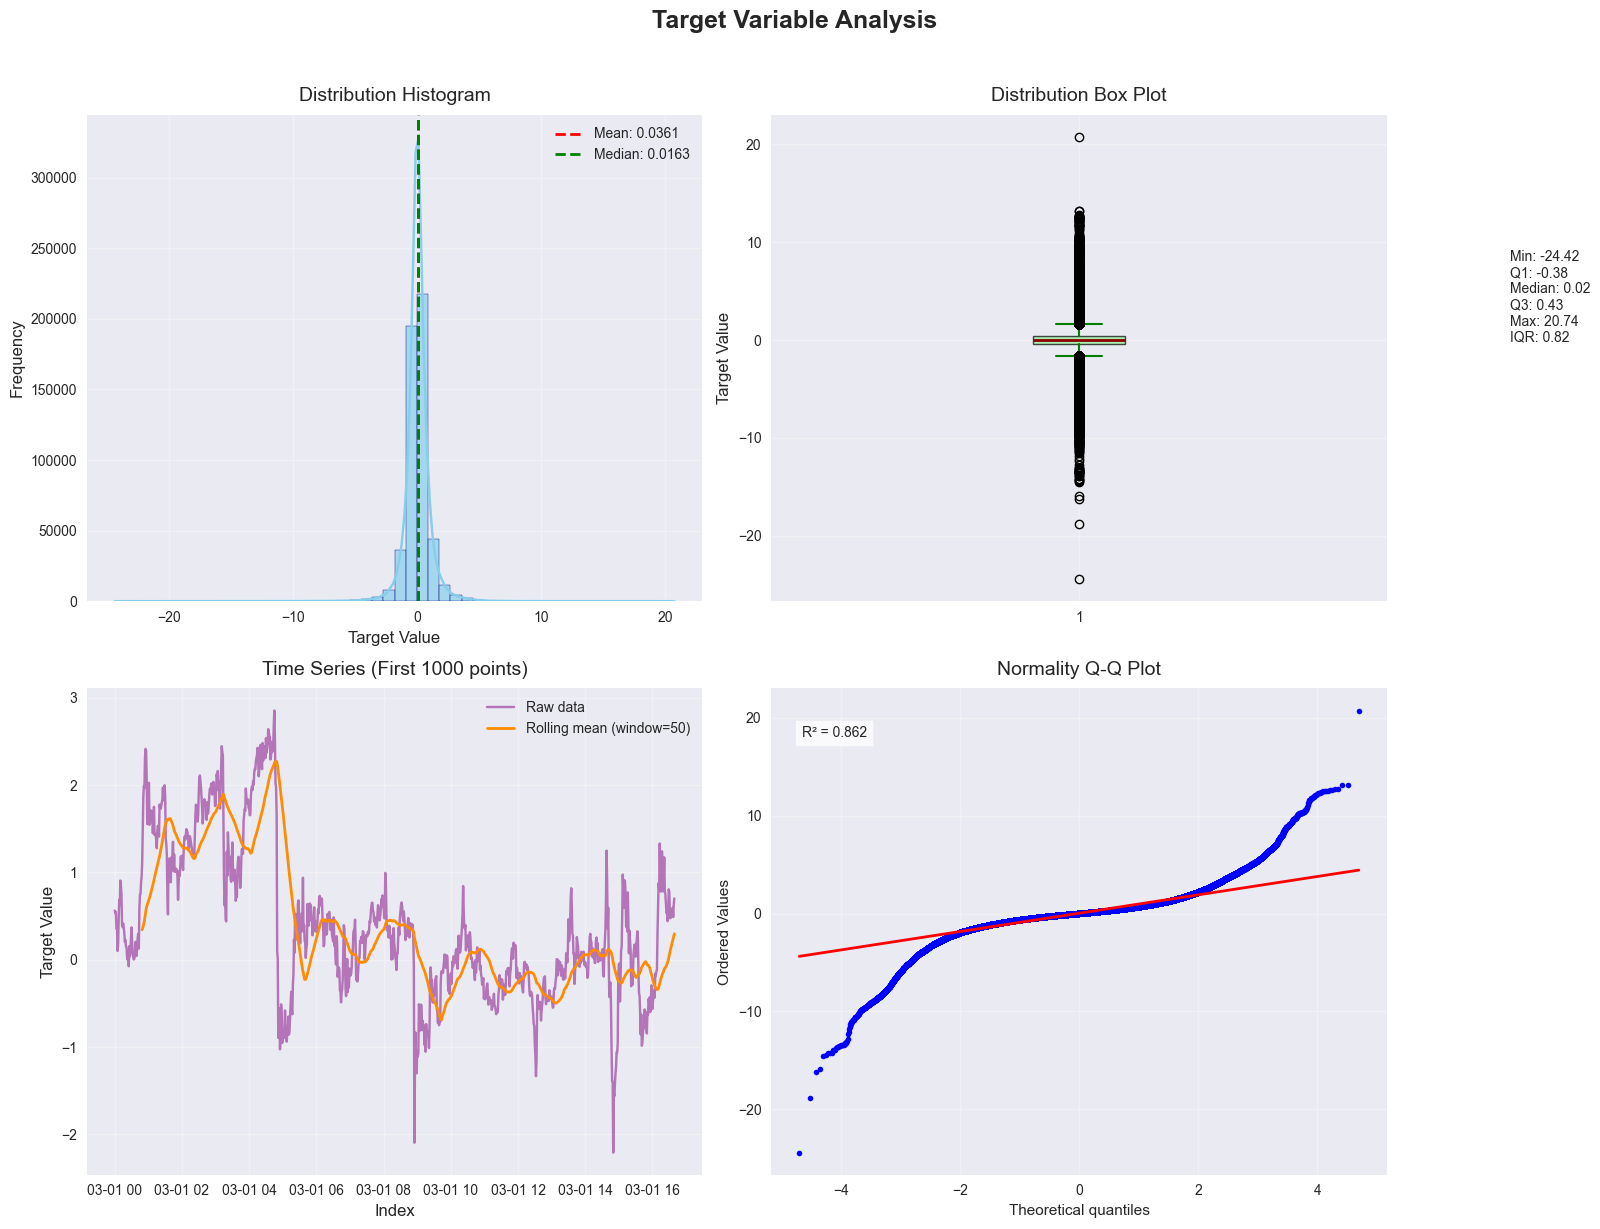

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
fig.suptitle('Target Variable Analysis', fontsize=18, y=1.02, fontweight='bold')

# Histogram with KDE
sns.histplot(target, bins=50, kde=True, ax=axes[0,0], color='skyblue', edgecolor='navy', alpha=0.7)
axes[0,0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {target.mean():.4f}')
axes[0,0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {target.median():.4f}')
axes[0,0].set_title('Distribution Histogram', fontsize=14, pad=10)
axes[0,0].set_xlabel('Target Value', fontsize=12)
axes[0,0].set_ylabel('Frequency', fontsize=12)
axes[0,0].legend(fontsize=10, framealpha=0.9)
axes[0,0].grid(True, alpha=0.3)
# Box plot with annotations
box = axes[0,1].boxplot(target, patch_artist=True,
                        boxprops=dict(facecolor='lightgreen', alpha=0.7),
                        whiskerprops=dict(color='green', linewidth=1.5),
                        capprops=dict(color='green', linewidth=1.5),
                        medianprops=dict(color='darkred', linewidth=2))

# summary statistics
stats_text = f"""
Min: {np.min(target):.2f}
Q1: {np.percentile(target, 25):.2f}
Median: {np.median(target):.2f}
Q3: {np.percentile(target, 75):.2f}
Max: {np.max(target):.2f}
IQR: {np.percentile(target, 75) - np.percentile(target, 25):.2f}
"""
axes[0,1].text(1.2, 0.5, stats_text, transform=axes[0,1].transAxes,
              bbox=dict(facecolor='white', alpha=0.8), fontsize=10)
axes[0,1].set_title('Distribution Box Plot', fontsize=14, pad=10)
axes[0,1].set_ylabel('Target Value', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# Time series with rolling average
sample_size = min(1000, len(target))
rolling_window = sample_size // 20  # 5% of sample size

axes[1,0].plot(target[:sample_size], alpha=0.5, color='purple', label='Raw data')
axes[1,0].plot(pd.Series(target[:sample_size]).rolling(rolling_window).mean(),
              color='darkorange', linewidth=2, label=f'Rolling mean (window={rolling_window})')
axes[1,0].set_title(f'Time Series (First {sample_size} points)', fontsize=14, pad=10)
axes[1,0].set_xlabel('Index', fontsize=12)
axes[1,0].set_ylabel('Target Value', fontsize=12)
axes[1,0].legend(fontsize=10)
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot with R² value
stats.probplot(target, dist="norm", plot=axes[1,1])
axes[1,1].lines[0].set_markerfacecolor('blue')
axes[1,1].lines[0].set_markersize(4.0)
axes[1,1].lines[1].set_color('red')
axes[1,1].lines[1].set_linewidth(2.0)

# Calculate R² for the Q-Q plot
(osm, osr), (slope, intercept, r) = stats.probplot(target, dist="norm")
axes[1,1].text(0.05, 0.9, f'R² = {r**2:.3f}', transform=axes[1,1].transAxes,
              bbox=dict(facecolor='white', alpha=0.8))
axes[1,1].set_title('Normality Q-Q Plot', fontsize=14, pad=10)
axes[1,1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
print("=== MISSING VALUES ANALYSIS ===")

# Training data
train_missing = train.isnull().sum()
train_missing_pct = (train_missing / len(train)) * 100
train_missing_df = pd.DataFrame({
    'Missing_Count': train_missing,
    'Missing_Percent': train_missing_pct
})
train_missing_df = train_missing_df[train_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"Training data:")
print(f"Columns with missing values: {len(train_missing_df)}")
if len(train_missing_df) > 0:
    print("Top 10 columns with missing values:")
    print(train_missing_df.head(10))
else:
    print("No missing values in training data!")

# Test data
test_missing = test.isnull().sum()
test_missing_pct = (test_missing / len(test)) * 100
test_missing_df = pd.DataFrame({
    'Missing_Count': test_missing,
    'Missing_Percent': test_missing_pct
})
test_missing_df = test_missing_df[test_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"\nTest data:")
print(f"Columns with missing values: {len(test_missing_df)}")
if len(test_missing_df) > 0:
    print("Top 10 columns with missing values:")
    print(test_missing_df.head(10))
else:
    print("No missing values in test data!")

=== MISSING VALUES ANALYSIS ===
Training data:
Columns with missing values: 0
No missing values in training data!

Test data:
Columns with missing values: 0
No missing values in test data!


In [10]:
print("=== FEATURE CORRELATION ANALYSIS ===")

# Get feature columns (exclude target)
feature_cols = [col for col in train.columns if col != 'label']
print(f"Analyzing {len(feature_cols)} features")

# Calculate correlations with target
correlations = []
target = train['label']

for col in feature_cols:
    try:
        corr, p_value = pearsonr(train[col].fillna(0), target)
        if not np.isnan(corr):
            correlations.append({
                'Feature': col,
                'Correlation': corr,
                'Abs_Correlation': abs(corr),
                'P_Value': p_value
            })
    except:
        continue

# Create correlation dataframe
corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

print(f"Successfully calculated correlations for {len(corr_df)} features")
print(f"\nTop 20 features by absolute correlation:")
print("-" * 60)
for i, row in corr_df.head(20).iterrows():
    significance = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['P_Value'] < 0.05 else ""
    print(f"{row['Feature']:>15}: {row['Correlation']:>8.6f} {significance}")

# Correlation strength distribution
strong_corr = corr_df[corr_df['Abs_Correlation'] > 0.1]
moderate_corr = corr_df[(corr_df['Abs_Correlation'] > 0.05) & (corr_df['Abs_Correlation'] <= 0.1)]
weak_corr = corr_df[corr_df['Abs_Correlation'] <= 0.05]

print(f"\nCorrelation strength distribution:")
print(f"Strong (|r| > 0.1): {len(strong_corr)} features")
print(f"Moderate (0.05 < |r| ≤ 0.1): {len(moderate_corr)} features")
print(f"Weak (|r| ≤ 0.05): {len(weak_corr)} features")

=== FEATURE CORRELATION ANALYSIS ===
Analyzing 895 features
Successfully calculated correlations for 868 features

Top 20 features by absolute correlation:
------------------------------------------------------------
            X21: 0.069401 ***
            X20: 0.067667 ***
            X28: 0.064092 ***
           X863: 0.064057 ***
            X29: 0.062339 ***
            X19: 0.062293 ***
            X27: 0.062251 ***
            X22: 0.057676 ***
           X858: 0.057320 ***
           X219: 0.056713 ***
           X860: 0.056259 ***
           X531: -0.056184 ***
           X287: 0.055893 ***
           X289: 0.055892 ***
           X291: 0.055435 ***
           X293: 0.055291 ***
           X857: 0.054686 ***
           X295: 0.054637 ***
           X598: 0.054528 ***
           X218: 0.053676 ***

Correlation strength distribution:
Strong (|r| > 0.1): 0 features
Moderate (0.05 < |r| ≤ 0.1): 31 features
Weak (|r| ≤ 0.05): 837 features


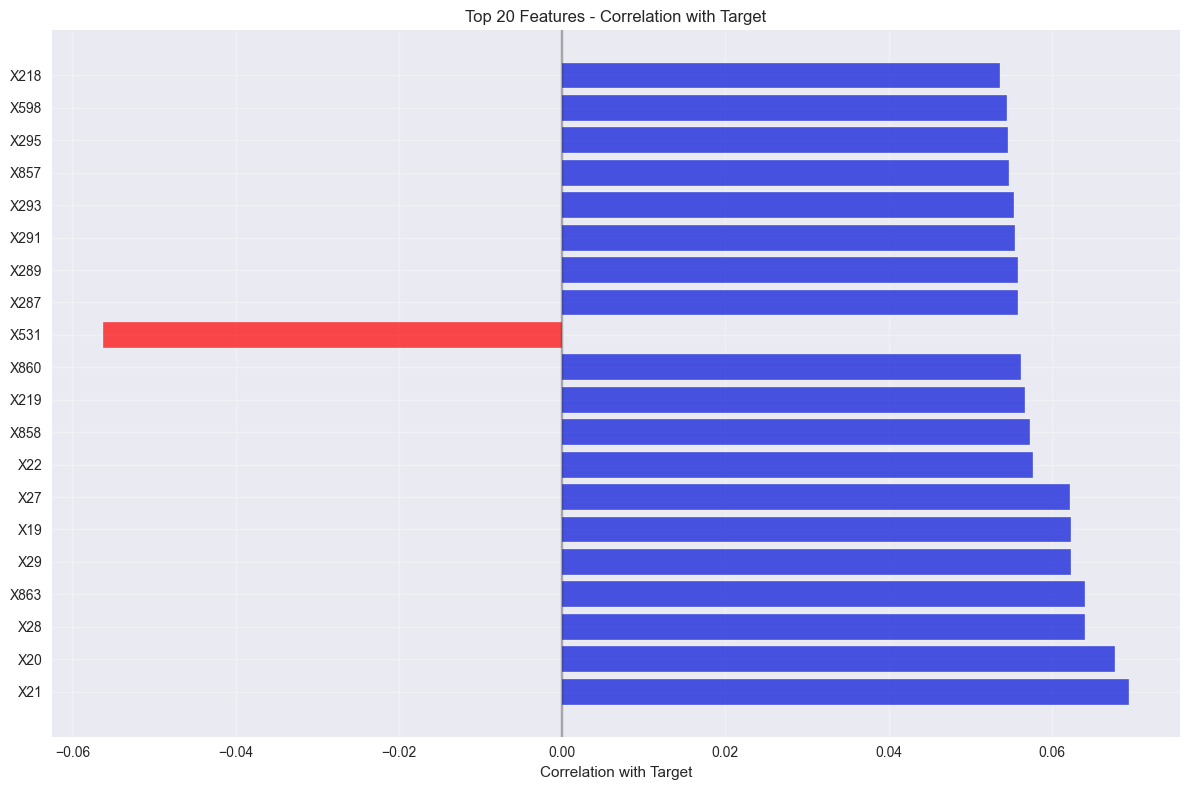

In [11]:
# Top correlations bar plot
top_20 = corr_df.head(20)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else '#0010d9' for x in top_20['Correlation']]
plt.barh(range(len(top_20)), top_20['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Correlation with Target')
plt.title('Top 20 Features - Correlation with Target')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

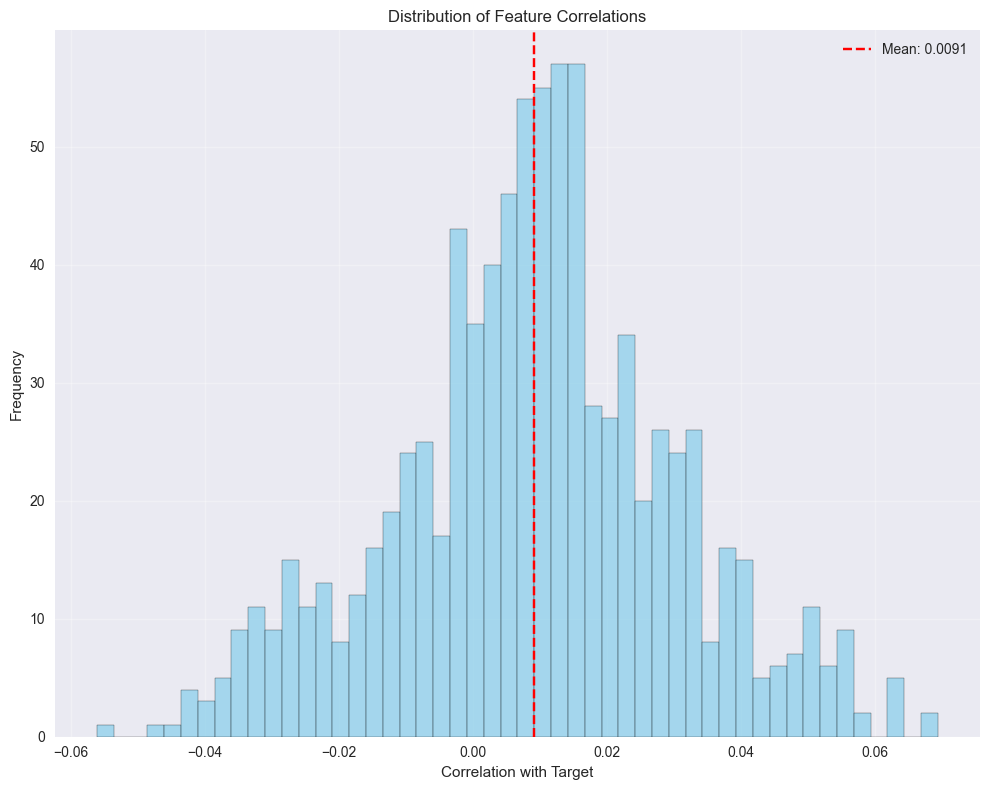

In [12]:
# Correlation distribution
plt.figure(figsize=(10, 8))
plt.hist(corr_df['Correlation'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(corr_df['Correlation'].mean(), color='red', linestyle='--',
           label=f'Mean: {corr_df["Correlation"].mean():.4f}')
plt.xlabel('Correlation with Target')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Correlations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

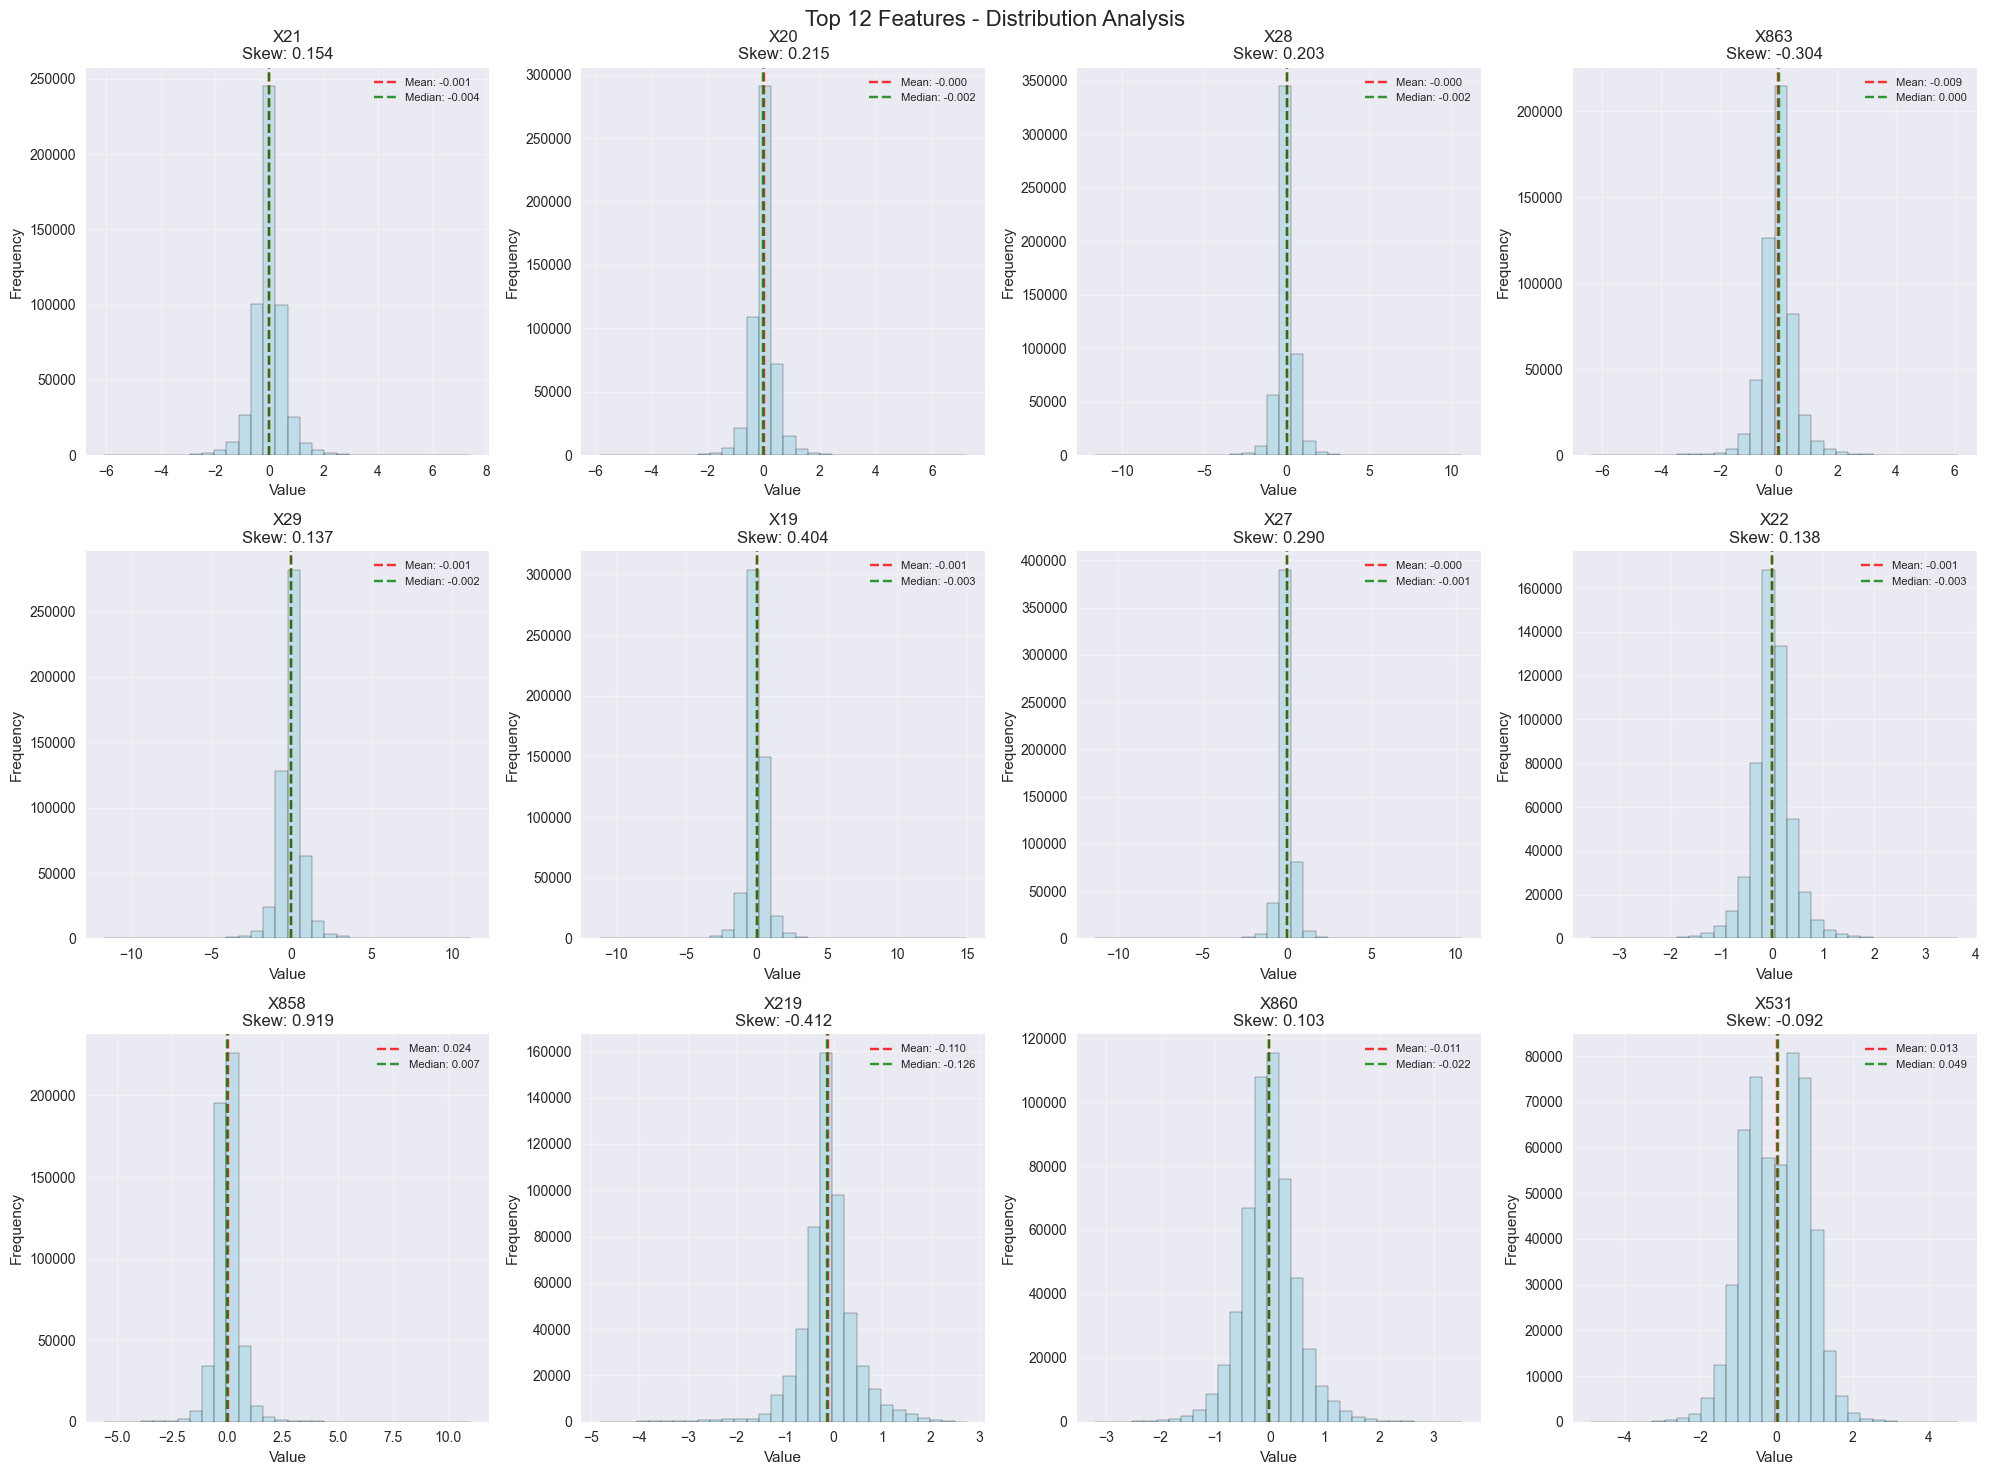

In [13]:
# Analyze top 12 features distributions
top_features = corr_df.head(12)['Feature'].tolist()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Top 12 Features - Distribution Analysis', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(top_features):
    data = train[feature].dropna()

    # Histogram
    axes[i].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black')

    # Add mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.3f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.3f}')

    axes[i].set_title(f'{feature}\nSkew: {data.skew():.3f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print("=== FEATURE STATISTICS SUMMARY ===")

# Get top 20 features for detailed analysis
top_20_features = corr_df.head(20)['Feature'].tolist()

# Create summary statistics
summary_stats = []
for feature in top_20_features:
    data = train[feature].dropna()
    stats_dict = {
        'Feature': feature,
        'Count': len(data),
        'Mean': data.mean(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        'Correlation': corr_df[corr_df['Feature'] == feature]['Correlation'].iloc[0]
    }
    summary_stats.append(stats_dict)

summary_df = pd.DataFrame(summary_stats)
print("Top 20 Features Summary Statistics:")
summary_df.round(4)

=== FEATURE STATISTICS SUMMARY ===
Top 20 Features Summary Statistics:


Feature   Count    Mean     Std      Min      Max  Skewness  Kurtosis  \
0      X21  525887 -0.0006  0.5753  -6.0847   7.4383    0.1542    8.7727   
1      X20  525887 -0.0004  0.4528  -5.8368   7.2461    0.2155   12.2882   
2      X28  525887 -0.0004  0.5873 -11.6092  10.6913    0.2035   14.7482   
3     X863  525887 -0.0094  0.5926  -6.3780   6.1179   -0.3039   10.5967   
4      X29  525887 -0.0006  0.7559 -11.6784  11.2066    0.1368   10.2020   
5      X19  525887 -0.0005  0.7037 -11.1577  14.9586    0.4044   17.1574   
6      X27  525887 -0.0002  0.4540 -11.3461  10.4119    0.2898   20.8639   
7      X22  525887 -0.0008  0.4081  -3.5585   3.6476    0.1378    5.1117   
8     X858  525887  0.0241  0.5413  -5.5692  11.0470    0.9192   12.7484   
9     X219  525887 -0.1104  0.5649  -4.8124   2.7422   -0.4121    5.8130   
10    X860  525887 -0.0114  0.4954  -3.1931   3.5268    0.1028    1.8825   
11    X531  525887  0.0132  0.7994  -4.8538   4.7630   -0.0915   -0.3354   
12    X287  525887  0.0052  0.4319  -4.9144   3.6779   -0.0017   13.7140   
13    X289  525887  0.0098  0.4367  -4.7322   3.6510    0.1418   13.5534   
14    X291  525887  0.0175  0.4418  -4.4234   3.7409    0.3771   13.4155   
15    X293  525887  0.0752  0.5301  -4.6372   4.7143    0.6883   12.1858   
16    X857  525887  0.0314  0.4741  -6.7262   8.1833    0.9301   21.8466   
17    X295  525887  0.0819  0.5325  -4.4353   4.7817    0.8078   12.1067   
18    X598  525887  0.0299  0.5190  -2.0000   2.0000    0.3027    7.0717   
19    X218  525887 -0.1070  0.7633  -7.5981   4.3964   -0.4175    7.7629   

    Correlation  
0        0.0694  
1        0.0677  
2        0.0641  
3        0.0641  
4        0.0623  
5        0.0623  
6        0.0623  
7        0.0577  
8        0.0573  
9        0.0567  
10       0.0563  
11      -0.0562  
12       0.0559  
13       0.0559  
14       0.0554  
15       0.0553  
16       0.0547  
17       0.0546  
18       0.0545  
19       0.0537

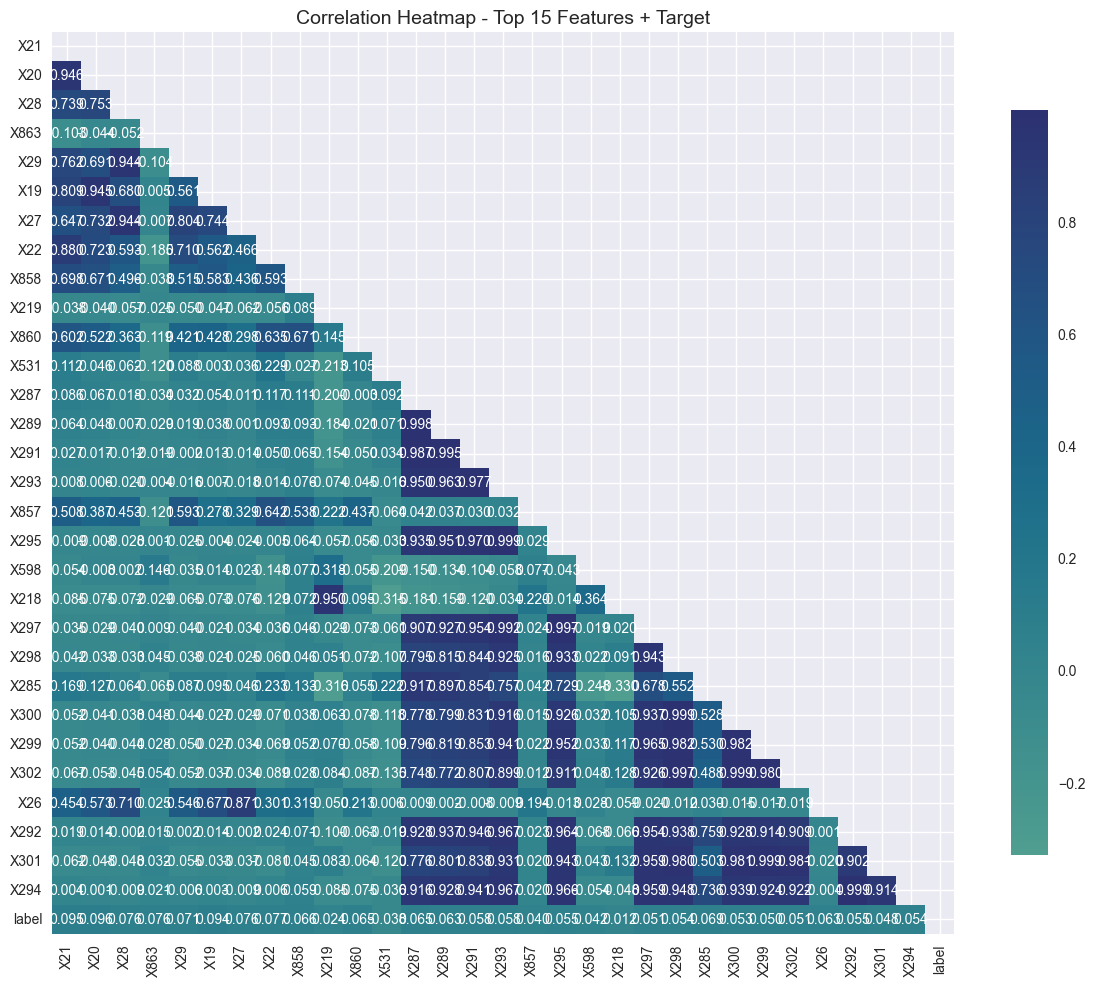

In [15]:
# Create correlation heatmap for top features
top_15_features = corr_df.head(30)['Feature'].tolist() + ['label']

# Sample data if too large
if len(train) > 5000:
    sample_data = train[top_15_features].sample(n=5000, random_state=42)
else:
    sample_data = train[top_15_features]

correlation_matrix = sample_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='crest',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap - Top 15 Features + Target', fontsize=14)
plt.tight_layout()
plt.show()

=== FEATURE VALUE RANGES ANALYSIS ===
Top 10 Features - Value Ranges:
   Feature        Min        Max      Range  1st_Quartile  3rd_Quartile  \
0      X21  -6.084697   7.438298  13.522995     -0.249627      0.246193   
1      X20  -5.836804   7.246099  13.082903     -0.184192      0.182678   
2      X28 -11.609230  10.691307  22.300537     -0.237477      0.232789   
3     X863  -6.378032   6.117887  12.495919     -0.282482      0.255341   
4      X29 -11.678420  11.206645  22.885066     -0.325992      0.322783   
5      X19 -11.157721  14.958593  26.116314     -0.271923      0.267984   
6      X27 -11.346147  10.411920  21.758067     -0.173128      0.169785   
7      X22  -3.558510   3.647619   7.206129     -0.195590      0.190618   
8     X858  -5.569221  11.046962  16.616183     -0.229482      0.257750   
9     X219  -4.812384   2.742236   7.554620     -0.364558      0.132104   
10    X860  -3.193107   3.526790   6.719897     -0.290761      0.259302   
11    X531  -4.853767   4.7630

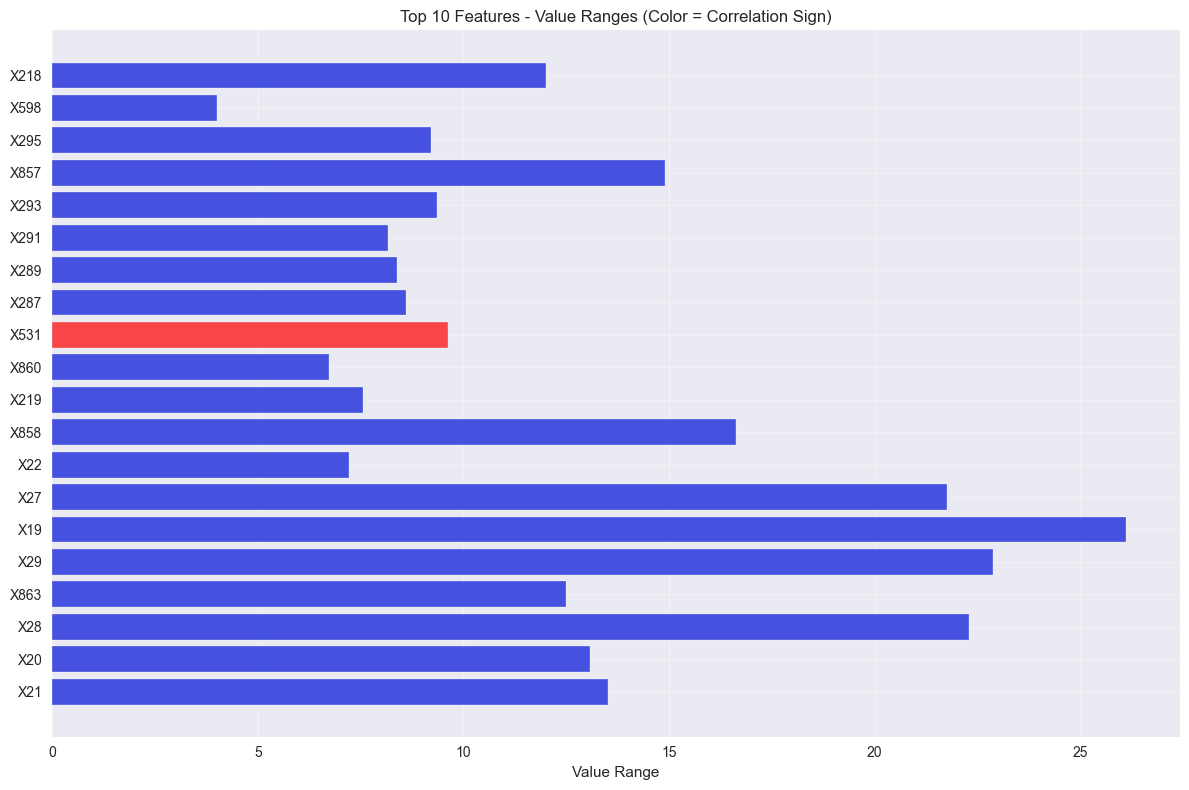

In [91]:
print("=== FEATURE VALUE RANGES ANALYSIS ===")

# Analyze value ranges for top features
top_20_features = corr_df.head(20)['Feature'].tolist()

range_analysis = []
for feature in top_20_features:
    data = train[feature].dropna()
    range_dict = {
        'Feature': feature,
        'Min': data.min(),
        'Max': data.max(),
        'Range': data.max() - data.min(),
        '1st_Quartile': data.quantile(0.25),
        '3rd_Quartile': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Correlation': corr_df[corr_df['Feature'] == feature]['Correlation'].iloc[0]
    }
    range_analysis.append(range_dict)

range_df = pd.DataFrame(range_analysis)
print("Top 10 Features - Value Ranges:")
print(range_df.round(6))

# Visualize ranges
plt.figure(figsize=(12, 8))
features = range_df['Feature']
ranges = range_df['Range']
colors = ['red' if x < 0 else '#0010d9' for x in range_df['Correlation']]

plt.barh(range(len(features)), ranges, color=colors, alpha=0.7)
plt.yticks(range(len(features)), features)
plt.xlabel('Value Range')
plt.title('Top 10 Features - Value Ranges (Color = Correlation Sign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [90]:
print("=== DATA QUALITY ASSESSMENT ===")

# Check for constant features
constant_features = []
for col in train.columns:
    if col != 'label':
        if train[col].nunique() <= 1:
            constant_features.append(col)

print(f"Constant features (nunique <= 1): {len(constant_features)}")
if constant_features:
    print("Constant features:", constant_features[:10])

# Check for highly skewed features
highly_skewed = []
for feature in corr_df.head(20)['Feature']:
    skew_val = train[feature].skew()
    if abs(skew_val) > 2:
        highly_skewed.append((feature, skew_val))

print(f"\nHighly skewed features (|skew| > 2): {len(highly_skewed)}")
for feature, skew_val in highly_skewed[:10]:
    print(f"  {feature}: {skew_val:.3f}")




=== DATA QUALITY ASSESSMENT ===
Constant features (nunique <= 1): 27
Constant features: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706']

Highly skewed features (|skew| > 2): 0


In [18]:
# Check feature correlations between themselves
print(f"\nInter-feature correlation analysis:")
top_features_for_corr = corr_df.head(100)['Feature'].tolist()
feature_corr_matrix = train[top_features_for_corr].corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i+1, len(feature_corr_matrix.columns)):
        corr_val = feature_corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.9:  # High correlation threshold
            high_corr_pairs.append((
                feature_corr_matrix.columns[i],
                feature_corr_matrix.columns[j],
                corr_val
            ))

corr_map = corr_df.set_index('Feature')['Abs_Correlation'].to_dict()

redundant_features = []
print(f"Highly correlated feature pairs (|r| > 0.9) in top 100 features by : {len(high_corr_pairs)}")
for feat1, feat2, corr_val in high_corr_pairs:
    corr1 = corr_map.get(feat1, 0)
    corr2 = corr_map.get(feat2, 0)
    # pick the feature with the smaller abs-corr to label
    drop = feat1 if corr1 < corr2 else feat2
    redundant_features.append(drop)
    print(f"  {feat1} ({corr1:.3f}) vs {feat2} ({corr2:.3f})  →  drop {drop}")

# dedupe
redundant_features = list(set(redundant_features))
print("\nFinal list of features to drop:", redundant_features)


Inter-feature correlation analysis:
Highly correlated feature pairs (|r| > 0.9) in top 100 features by : 173
  X21 (0.069) vs X20 (0.068)  →  drop X20
  X20 (0.068) vs X19 (0.062)  →  drop X19
  X28 (0.064) vs X29 (0.062)  →  drop X29
  X28 (0.064) vs X27 (0.062)  →  drop X27
  X22 (0.058) vs X23 (0.045)  →  drop X23
  X219 (0.057) vs X218 (0.054)  →  drop X218
  X219 (0.057) vs X226 (0.045)  →  drop X226
  X287 (0.056) vs X289 (0.056)  →  drop X289
  X287 (0.056) vs X291 (0.055)  →  drop X291
  X287 (0.056) vs X293 (0.055)  →  drop X293
  X287 (0.056) vs X295 (0.055)  →  drop X295
  X287 (0.056) vs X297 (0.053)  →  drop X297
  X287 (0.056) vs X285 (0.053)  →  drop X285
  X287 (0.056) vs X292 (0.052)  →  drop X292
  X287 (0.056) vs X294 (0.051)  →  drop X294
  X287 (0.056) vs X288 (0.049)  →  drop X288
  X287 (0.056) vs X290 (0.049)  →  drop X290
  X287 (0.056) vs X286 (0.049)  →  drop X286
  X289 (0.056) vs X291 (0.055)  →  drop X291
  X289 (0.056) vs X293 (0.055)  →  drop X293
  X28

In [19]:
# Removing the redundant ie internally correlated features from the moderate_corr
corr_features = [f for f in moderate_corr['Feature'].tolist() if f not in redundant_features]
print(f"There are {len(corr_features)} non-redundant features correlated with target:")
print(corr_features)

There are 12 non-redundant features correlated with target:
['X21', 'X28', 'X863', 'X22', 'X858', 'X219', 'X860', 'X531', 'X287', 'X857', 'X598', 'X26']


=== PCA-BASED FEATURE IMPORTANCE ANALYSIS ===


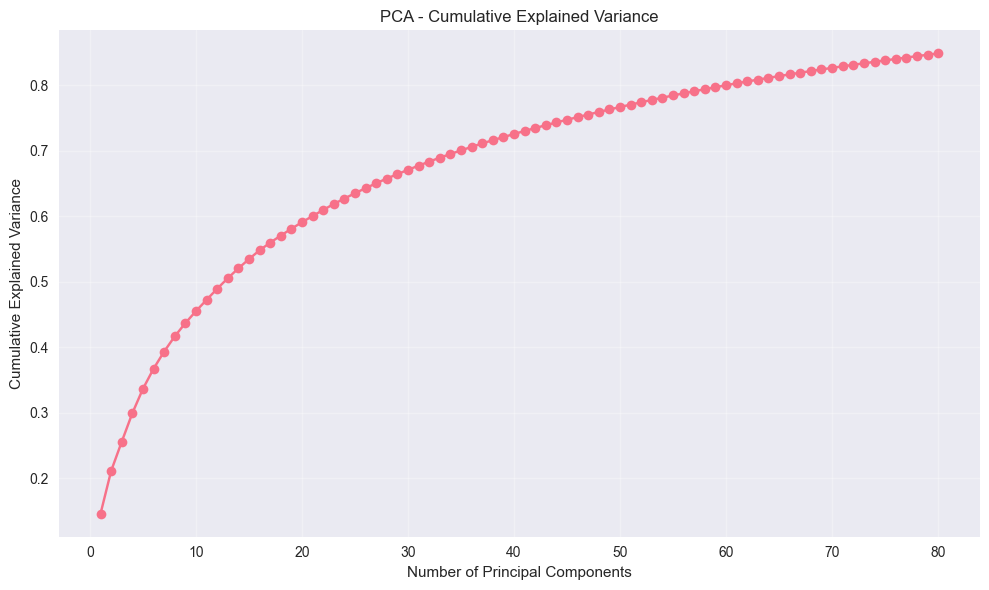

Top 10 contributing features for each of the first 50 principal components:
PC1: ['X726', 'X727', 'X728', 'X729', 'X724', 'X725', 'X433', 'X845', 'X731', 'X730']
PC2: ['X720', 'X721', 'X12', 'X245', 'X238', 'X13', 'X11', 'X246', 'X259', 'X258']
PC3: ['X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X44', 'X51', 'X52', 'X42']
PC4: ['X859', 'X773', 'X772', 'X744', 'X745', 'X769', 'X777', 'X776', 'X768', 'X829']
PC5: ['X452', 'X445', 'X451', 'X459', 'X444', 'X458', 'X450', 'X457', 'X473', 'X443']
PC6: ['X399', 'X315', 'X357', 'X363', 'X321', 'X405', 'X68', 'X152', 'X110', 'X116']
PC7: ['X226', 'X219', 'X205', 'X198', 'X511', 'X504', 'X204', 'X225', 'X197', 'X211']
PC8: ['X243', 'X236', 'X244', 'X237', 'X490', 'X483', 'X491', 'X448', 'X441', 'X484']
PC9: ['X31', 'X30', 'X32', 'X171', 'X177', 'X857', 'X165', 'X135', 'X129', 'X24']
PC10: ['X649', 'X655', 'X637', 'X643', 'X658', 'X652', 'X646', 'X640', 'X625', 'X631']
PC11: ['X646', 'X640', 'X658', 'X652', 'X637', 'X643', 'X655', 'X649', 'X634', 'X

In [259]:
print("=== PCA-BASED FEATURE IMPORTANCE ANALYSIS ===")

# Prepare feature matrix (exclude target and constant features)
feature_cols = [col for col in train.columns if col != 'label' and col not in constant_features]
X = train[feature_cols].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
n_components = min(80, X_scaled.shape[1])
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find most important features for the top principal components
n_top_components = 50
top_features_per_pc = {}

for i in range(n_top_components):
    component = pca.components_[i]
    abs_loadings = np.abs(component)
    top_idx = abs_loadings.argsort()[::-1][:10]
    top_features = [feature_cols[idx] for idx in top_idx]
    top_features_per_pc[f'PC{i+1}'] = top_features

print(f"Top 10 contributing features for each of the first {n_top_components} principal components:")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")

# Aggregate feature importance across top PCs
from collections import Counter
all_top_features = sum(top_features_per_pc.values(), [])
feature_counts = Counter(all_top_features)
most_common_features = feature_counts.most_common(100)

print("\nMost frequently appearing features in top principal components:")
for feat, count in most_common_features:
    print(f"{feat}: {count} times")

In [260]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -8.743734  5.341038  0.110757 -7.529283  4.766293 -5.740211 -0.428687   
1 -8.041825  5.414389 -0.081279 -4.777105  4.087102 -6.214724 -0.168807   
2 -8.285092  4.999424 -0.209784 -4.027124  3.918497 -5.541315 -0.269891   
3 -6.630135  7.397834 -0.997337 -5.036316  4.928012 -5.855556  0.736986   
4 -6.532334  7.035981 -0.568551 -5.275315  4.684655 -6.370769  0.629975   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.587402  2.682227 -1.014168  3.182052  3.031582  6.842461  0.276369   
1 -0.156995  3.708451  0.357369  2.640265  3.331486  6.124774  0.358028   
2  1.086087  3.361933  1.302929  2.083789  3.411148  5.355572 -0.316131   
3 -1.783490  4.991368 -0.513970  3.122575  3.156472  6.654338  0.324798   
4 -0.563531  4.941128  0.290279  3.222194  2.915401  5.899597 -0.148685   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.932195 -2.380404  3.223823  4.267613  1.181822  0.291194  1.017191   
1 -3.393320 -2.436401  3.704921  3.195941  3.394478  1.729660 -2.299480   
2 -3.417012 -2.660178  3.472213  2.041849  3.078860  2.355974 -2.924920   
3 -4.110961 -2.133084  3.031839  3.786194  3.149516  0.081036 -1.209303   
4 -3.735723 -1.955812  2.914058  2.596058  3.264604  1.669000 -1.723251   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.827571 -3.628116  0.931222 -3.825940  4.626591  1.062821 -0.181413   
1  0.590473 -1.857061 -1.532678  1.703945  4.218613 -0.796358  0.077397   
2  0.418952 -2.752222 -2.117515  4.519635  3.167869 -1.406156 -0.430334   
3  0.089635 -1.904738 -2.717173  2.654530  4.660084 -2.264011 -0.477711   
4  0.588189 -1.692289 -1.655967  2.299794  3.619240 -2.723844 -0.528006   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.440492  3.204852 -2.066417  1.932837 -0.098067  0.895457  1.484745   
1  0.114373  2.212292  0.323659  1.662946 -0.240055  1.237928  2.168580   
2  0.618122  1.711798  1.297722  1.620879 -0.211350  1.119410  2.616632   
3  1.182297  1.901210  1.592723  2.177264 -0.715644  1.643786  1.475302   
4  0.991176  1.530574  1.089886  1.532271 -0.660137  1.711131  1.770637   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  3.125330  0.414402 -0.041263 -0.182835 -0.162515  1.887530  0.656157   
1  2.474183 -0.773737  0.225231  0.599407  0.008196  0.983741  1.069866   
2  1.823859 -0.763474  0.567697  0.471483 -0.067411  0.295525  1.005934   
3  3.229336 -1.100706  0.436178 -0.306060 -0.059337  1.618453  0.805109   
4  2.128033 -1.770364  0.354008 -0.514154 -0.472750  0.867437  0.603315   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.093976  0.753964 -1.912105  2.225040 -0.493845  0.313188 -0.706566   
1 -0.117952  0.350622 -1.101704  0.938852 -0.812453 -0.494158 -1.255980   
2 -0.566814  0.557928 -1.128577  0.941898 -1.234668 -0.300390 -1.634488   
3 -0.025282  0.960220 -1.662151  1.176449 -1.641018 -1.938527 -1.474666   
4 -0.176708  0.877699 -1.802509  1.557432 -1.312197 -1.620149 -1.469983   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -0.930053  1.612229  0.751890 -1.085892  1.409330 -1.520726 -1.025916   
1  1.006487  1.409950  0.353236 -1.391606  1.560604 -0.819178 -3.550312   
2  0.667796  1.530804  0.207014 -2.049375  1.813838 -1.739804 -3.866392   
3  0.379081  1.664554  1.154938 -0.699235  1.218280 -1.257378 -4.808709   
4  0.639487  1.406073  0.654175  0.154018  1.114416 -1.569581 -4.853235   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0  2.281018 -0.079880  0.490654 -1.245191 -0.290826 -2.682575  1.032478   
1  1.920246 -0.883325 -2.189351 -2.834717 -1.319719 -1.628298 -0.322297   
2  1.730172 -2.076456 -1.744330 -2.626013 -0.966361 -1.926557  0.061591   
3  2.699680 -2.368802 -2.841906 -2.441468 -2.572241 -2.288679 -0.903329   
4  2.293079 -2.596838 -3.

In [261]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
bid_qty  -0.004475  0.003170 -0.010820 -0.008158 -0.028282 -0.000457   
ask_qty  -0.003030  0.004698 -0.014320 -0.007404 -0.029175  0.008911   
buy_qty   0.010918  0.008650  0.008312 -0.004536  0.018294  0.026501   
sell_qty  0.001564 -0.011306  0.009727 -0.001189  0.014484  0.027582   
volume    0.006522 -0.001435  0.009458 -0.002994  0.017173  0.028351   
...            ...       ...       ...       ...       ...       ...   
X886      0.000102 -0.000190 -0.018299 -0.003938 -0.014611 -0.007715   
X887      0.000064 -0.000426 -0.018689 -0.004463 -0.014939 -0.008285   
X888      0.000174 -0.000699 -0.019108 -0.005626 -0.015141 -0.008199   
X889      0.000423 -0.000645 -0.016740 -0.006122 -0.014225 -0.006953   
X890      0.001038 -0.000562 -0.010826 -0.006897 -0.011809 -0.004634   

               PC7       PC8       PC9      PC10      PC11      PC12  \
bid_qty   0.003545  0.003147  0.016386  0.007608  0.012152 -0.006612   
ask_qty  -0.003164 -0.002025  0.011977  0.011067  0.001878 -0.003824   
buy_qty   0.024555 -0.003905 -0.029092 -0.010307 -0.047157  0.034887   
sell_qty  0.009384  0.032376 -0.046766  0.021937 -0.069897  0.040765   
volume    0.017757  0.015002 -0.039801  0.006166 -0.061405  0.039667   
...            ...       ...       ...       ...       ...       ...   
X886     -0.010171 -0.000511  0.019246 -0.010046  0.008255 -0.041826   
X887     -0.009058  0.000269  0.020564 -0.010609  0.008925 -0.039411   
X888     -0.006286  0.002331  0.023670 -0.011923  0.009352 -0.029468   
X889     -0.003777  0.003834  0.024671 -0.011765  0.008757 -0.019053   
X890     -0.000091  0.005302  0.023715 -0.010545  0.005493 -0.005674   

              PC13      PC14      PC15      PC16      PC17      PC18  \
bid_qty   0.001417 -0.006558 -0.006676  0.001349  0.002210  0.011325   
ask_qty  -0.004334 -0.007417 -0.008145  0.002449 -0.002714  0.012456   
buy_qty   0.105096  0.044310  0.042720  0.025995  0.046909 -0.046638   
sell_qty  0.086141  0.031178  0.052013  0.022138  0.046528 -0.074558   
volume    0.100200  0.039540  0.049676  0.025221  0.048976 -0.063587   
...            ...       ...       ...       ...       ...       ...   
X886     -0.063817 -0.065436 -0.014827 -0.026344  0.029643  0.053442   
X887     -0.064338 -0.067434 -0.015312 -0.026655  0.029996  0.056943   
X888     -0.066016 -0.067365 -0.014989 -0.027341  0.030323  0.062227   
X889     -0.063198 -0.062291 -0.014881 -0.026016  0.029105  0.062281   
X890     -0.053696 -0.051520 -0.015858 -0.022043  0.024369  0.057708   

              PC19      PC20      PC21      PC22      PC23      PC24  \
bid_qty  -0.011329  0.003495  0.009050  0.008545  0.002550 -0.009479   
ask_qty   0.004953  0.010873  0.010698  0.013856 -0.012280 -0.003287   
buy_qty  -0.049078 -0.060538 -0.017676 -0.004878 -0.032856 -0.006254   
sell_qty -0.030855 -0.024837 -0.027595  0.006071 -0.044357  0.015017   
volume   -0.041859 -0.044674 -0.023751  0.000649 -0.040497  0.004639   
...            ...       ...       ...       ...       ...       ...   
X886     -0.101615 -0.006555  0.085867  0.181761 -0.049700 -0.043005   
X887     -0.101802 -0.004524  0.088061  0.186028 -0.050928 -0.043567   
X888     -0.096345 -0.000462  0.093030  0.192414 -0.053360 -0.043362   
X889     -0.085701  0.002445  0.095177  0.188947 -0.054554 -0.041797   
X890     -0.065877  0.005626  0.091390  0.168877 -0.052126 -0.035953   

              PC25      PC26      PC27      PC28      PC29      PC30  \
bid_qty  -0.004215  0.011298 -0.014351  0.003294 -0.004135  0.019694   
ask_qty   0.011298 -0.007334 -0.010427  0.009470  0.010311  0.000887   
buy_qty  -0.018904  0.064330  0.141233 -0.016356 -0.000995 -0.026977   
sell_qty -0.001125  0.039346  0.131821 -0.031900 -0.012176 -0.038827   
volume   -0.010460  0.054290  0.143106 -0.025328 -0.006928 -0.034518   
...            ...       ...       ...       ...       ...       ...   
X886     -0.002729 -0.075047  0.016947 -0.042325 -0

In [265]:
from sklearn.feature_selection import mutual_info_regression
from joblib import parallel_backend

def make_mi_scores(X, y):
    with parallel_backend('loky', n_jobs=-1):
        mi_scores = mutual_info_regression(X, y, n_neighbors=3)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [266]:
y = train.label
mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1      0.058878
PC6      0.027462
PC13     0.026442
PC4      0.026428
PC3      0.026048
           ...   
PC818    0.003215
PC564    0.003127
PC592    0.002984
PC658    0.002728
PC819    0.002111
Name: MI Scores, Length: 868, dtype: float64

In [272]:
loadings['PC1'].abs().sort_values(ascending=False)

X726    0.080449
X727    0.079224
X728    0.076789
X729    0.075966
X724    0.075804
          ...   
X501    0.000119
X885    0.000110
X886    0.000102
X884    0.000081
X887    0.000064
Name: PC1, Length: 868, dtype: float64

In [277]:
overlap = []
for feat, count in most_common_features:
    if feat in top_features_for_corr:
        overlap.append(feat)
print(f"Common features between top {len(top_features_for_corr)} corr and top {len(most_common_features)} pca: {overlap}")

Common features between top 100 corr and top 100 pca: ['X205', 'X367', 'X612']


In [273]:
pca_common_100_features = [x[0] for x in most_common_features]
print(len(pca_common_100_features), pca_common_100_features)

100 ['X603', 'X602', 'X601', 'X629', 'X641', 'X745', 'X481', 'X604', 'X558', 'X609', 'X611', 'X514', 'X610', 'X622', 'X613', 'X618', 'X630', 'X624', 'X615', 'X627', 'X621', 'X633', 'X636', 'X156', 'X397', 'X403', 'X409', 'X617', 'X561', 'X773', 'X777', 'X829', 'X205', 'X204', 'X211', 'X649', 'X655', 'X637', 'X643', 'X658', 'X652', 'X646', 'X640', 'X672', 'X666', 'X684', 'X675', 'X663', 'X678', 'X669', 'X654', 'X660', 'X881', 'X594', 'X596', 'X82', 'X124', 'X242', 'X235', 'X489', 'X482', 'X605', 'X600', 'X488', 'X241', 'X555', 'X557', 'X564', 'X889', 'X888', 'X890', 'X887', 'X886', 'X801', 'X800', 'X805', 'X536', 'volume', 'buy_qty', 'sell_qty', 'X653', 'X579', 'X779', 'X783', 'X616', 'X619', 'X543', 'X150', 'X367', 'X612', 'X162', 'X608', 'X391', 'X506', 'X554', 'X114', 'X120', 'X389', 'X347', 'X395']


In [122]:
print("=== FILTERING OUT NOISY/OVERFITTING FEATURES ===")

# 1. Remove near-constant features (already identified as constant_features)
from sklearn.feature_selection import VarianceThreshold

# Set a low threshold to remove near-constant features (e.g., variance < 1e-5)
selector = VarianceThreshold(threshold=1e-5)
X_temp = train[[col for col in train.columns if col != 'label' and col not in constant_features]].fillna(0)
selector.fit(X_temp)
low_variance_features = [col for col, keep in zip(X_temp.columns, selector.get_support()) if not keep]

print(f"Near-constant features (variance < 1e-5): {len(low_variance_features)}")
if low_variance_features:
    print("Sample:", low_variance_features[:10])

# 2. Remove features with extremely high correlation to the target (possible leakage/overfitting)
# (e.g., |correlation| > 0.99)
overfit_corr_features = corr_df[corr_df['Abs_Correlation'] > 0.99]['Feature'].tolist()
print(f"Features with |correlation| > 0.99 to target: {len(overfit_corr_features)}")
if overfit_corr_features:
    print("Sample:", overfit_corr_features[:10])

# 3. Remove features with very low correlation to the target (not predictive)
# (e.g., |correlation| < 0.05)
low_corr_features = corr_df[corr_df['Abs_Correlation'] < 0.045]['Feature'].tolist()
print(f"Features with |correlation| < 0.045: {len(low_corr_features)}")
if low_corr_features:
    print("Sample:", low_corr_features[:10])

# 4. Remove multicollinear features from top features
# Start with top N correlated features
n_top_features = len(corr_df)-len(low_corr_features) # Adjust this number based on your dataset
top_features = corr_df.head(n_top_features)['Feature'].tolist()

# Calculate correlation matrix for top features
top_features_corr = train[top_features].corr().abs()

# Track removed features due to multicollinearity
multicollinear_removed = []

# Iteratively remove highly correlated features
# For each feature pair with correlation > 0.9, keep the one with higher correlation to target
to_drop = set()
for i in range(len(top_features)):
    if top_features[i] in to_drop:
        continue

    for j in range(i+1, len(top_features)):
        if top_features[j] in to_drop:
            continue

        if top_features_corr.iloc[i, j] > 0.9:
            # Get correlations with target
            corr_i = corr_df[corr_df['Feature'] == top_features[i]]['Abs_Correlation'].values[0]
            corr_j = corr_df[corr_df['Feature'] == top_features[j]]['Abs_Correlation'].values[0]

            # Drop feature with lower correlation to target
            if corr_i < corr_j:
                to_drop.add(top_features[i])
                multicollinear_removed.append((top_features[i], top_features[j], top_features_corr.iloc[i, j]))
                break
            else:
                to_drop.add(top_features[j])
                multicollinear_removed.append((top_features[j], top_features[i], top_features_corr.iloc[i, j]))

multicollinear_features = list(to_drop)
print(f"\nMulticollinear features removed (correlation > 0.9): {len(multicollinear_features)}")
if multicollinear_features:
    print("Sample removed features:", multicollinear_features[:10])

if multicollinear_removed:
    print("\nSample multicollinear pairs (removed, kept, correlation):")
    for removed, kept, corr_val in multicollinear_removed[:10]:
        print(f"  Removed: {removed}, Kept: {kept}, Correlation: {corr_val:.4f}")

# Final set of filtered features
filtered_features = [
    col for col in train.columns
    if col != 'label'
    and col not in constant_features
    and col not in low_variance_features
    and col not in overfit_corr_features
    and col not in low_corr_features
    and col not in multicollinear_features
]

print(f"\nFinal number of features after filtering: {len(filtered_features)}")

# Check how many top features we retained
top_features_set = set(top_features)
retained_top_features = [f for f in filtered_features if f in top_features_set]
print(f"Retained {len(retained_top_features)} of the top {n_top_features} correlated features")
print(f"\nFeatures after filtering: {retained_top_features[:10]}")

=== FILTERING OUT NOISY/OVERFITTING FEATURES ===
Near-constant features (variance < 1e-5): 0
Features with |correlation| > 0.99 to target: 0
Features with |correlation| < 0.05: 819
Sample: ['X23', 'X137', 'X284', 'X95', 'X198', 'X272', 'X472', 'X277', 'X580', 'X224']

Multicollinear features removed (correlation > 0.9): 25
Sample removed features: ['X285', 'X301', 'X300', 'X303', 'X20', 'X27', 'X175', 'X226', 'X218', 'X281']

Sample multicollinear pairs (removed, kept, correlation):
  Removed: X20, Kept: X21, Correlation: 0.9490
  Removed: X29, Kept: X28, Correlation: 0.9478
  Removed: X27, Kept: X28, Correlation: 0.9482
  Removed: X218, Kept: X219, Correlation: 0.9490
  Removed: X226, Kept: X219, Correlation: 0.9235
  Removed: X289, Kept: X287, Correlation: 0.9981
  Removed: X291, Kept: X287, Correlation: 0.9868
  Removed: X293, Kept: X287, Correlation: 0.9489
  Removed: X295, Kept: X287, Correlation: 0.9341
  Removed: X297, Kept: X287, Correlation: 0.9048

Final number of features af

In [22]:
print("=" * 60)
print("🎯 FINAL EDA SUMMARY AND INSIGHTS")
print("=" * 60)

print(f"📊 Dataset Overview:")
print(f"  • Training samples: {len(train):,}")
print(f"  • Test samples: {len(test):,}")
print(f"  • Total features: {len([col for col in train.columns if col != 'label'])}")
print(f"  • Target variable: 'label'")

print(f"\n🎯 Target Variable:")
print(f"  • Mean: {target.mean():.6f}")
print(f"  • Std: {target.std():.6f}")
print(f"  • Skewness: {target.skew():.3f}")
print(f"  • Distribution: {'Normal' if abs(target.skew()) < 0.5 else 'Skewed'}")

print(f"\n🔍 Data Quality:")
missing_cols = len([col for col in train.columns if train[col].isnull().sum() > 0])
print(f"  • Columns with missing values: {missing_cols}")
print(f"  • Constant features: {len(constant_features)}")
print(f"  • Highly skewed features: {len(highly_skewed)}")

print(f"\n📈 Feature Correlations:")
print(f"  • Features with strong correlation (|r| > 0.1): {len(strong_corr)}")
print(f"  • Features with moderate correlation (0.05 < |r| ≤ 0.1): {len(moderate_corr)}")
print(f"  • Features with weak correlation (|r| ≤ 0.05): {len(weak_corr)}")

print(f"\n🏆 Top 5 Most Important Features:")
for i, row in corr_df.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Correlation']:.6f}")

print(f"\n💡 Key Insights:")
print(f"  • Target shows {'low' if target.std() < 0.01 else 'moderate' if target.std() < 0.1 else 'high'} variability")
print(f"  • {'Few' if len(strong_corr) < 10 else 'Many'} features show strong correlation with target")
print(f"  • Data appears {'clean' if missing_cols == 0 else 'to have missing values'}")
print(f"  • Feature engineering {'may' if len(highly_skewed) > 5 else 'might not'} be needed for skewed features")

print("\n EDA Complete! feel free to create a copy and share your insights in the comments !")
print(train.index.name)

🎯 FINAL EDA SUMMARY AND INSIGHTS
📊 Dataset Overview:
  • Training samples: 525,887
  • Test samples: 538,150
  • Total features: 895
  • Target variable: 'label'

🎯 Target Variable:
  • Mean: 0.036126
  • Std: 1.009914
  • Skewness: -0.113
  • Distribution: Normal

🔍 Data Quality:
  • Columns with missing values: 0
  • Constant features: 27
  • Highly skewed features: 0

📈 Feature Correlations:
  • Features with strong correlation (|r| > 0.1): 0
  • Features with moderate correlation (0.05 < |r| ≤ 0.1): 31
  • Features with weak correlation (|r| ≤ 0.05): 837

🏆 Top 5 Most Important Features:
  26. X21: 0.069401
  25. X20: 0.067667
  33. X28: 0.064092
  847. X863: 0.064057
  34. X29: 0.062339

💡 Key Insights:
  • Target shows high variability
  • Few features show strong correlation with target
  • Data appears clean
  • Feature engineering might not be needed for skewed features

 EDA Complete! feel free to create a copy and share your insights in the comments !
timestamp


In [24]:
# Create dictionary to store model results
model_results = {}

In [278]:
print("=== MACHINE LEARNING REGRESSION MODELS ===")

# Import required libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgbm
import time

# top_100_features = corr_df.head(100)['Feature'].tolist()
top_100_features = corr_df.head(100)['Feature'].tolist()

# Helper function to evaluate and store model results
def evaluate_model(model, name, selected_features, cv=5):
    start_time = time.time()
    # Use the filtered features we identified earlier
    X = reduce_mem_usage(train[selected_features].copy(), f"train")
    y = train['label'].copy()

    # Fill missing values
    # X = X.fillna(X.mean())

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training data shape: {X_train.shape}")
    print(f"Validation data shape: {X_val.shape}")

    #For grid search n_estimators
    eval_set = [(X_val, y_val)]

    # Fit model
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True, random_state=42),
                               scoring='mean_squared_error', params={"eval_set": [(X, y)],
        "verbose": False})

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    cv_rmse = np.sqrt(-cv_scores.mean())

    # Store results
    model_results[name] = {
        'model': model,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'train_mae': train_mae,
        'val_mae': val_mae,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'cv_rmse': cv_rmse,
        'best_iteration': model.best_iteration,
        'time': time.time() - start_time,
        'features': selected_features
    }

    print(f"{name}:")
    print(f"  Train MSE: {train_mse:.6f}, MAE: {train_mae:.6f}, R²: {train_r2:.6f}")
    print(f"  Val MSE: {val_mse:.6f}, MAE: {val_mae:.6f}, R²: {val_r2:.6f}")
    print(f"  CV RMSE: {cv_rmse:.6f}, Time: {model_results[name]['time']:.2f}s")
    print(f"  Best Iteration: {model_results[name]['best_iteration']:d}")

    return model

=== MACHINE LEARNING REGRESSION MODELS ===


In [149]:
# 1. XGBoost retained_top_features
print("\n--- XGBoost ---")
xgb_model_topcorr = xgb.XGBRegressor(n_estimators=20000, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=5)
xgb_model_topcorr = evaluate_model(xgb_model_topcorr, "XGBoostCorr", selected_features=retained_top_features)


--- XGBoost ---
Reducing memory usage for: train
--- Memory usage before: 116.43 MB
--- Memory usage after: 44.21 MB
--- Decreased memory usage by 62.0%

Training data shape: (420709, 24)
Validation data shape: (105178, 24)
[0]	validation_0-rmse:1.00958
[1]	validation_0-rmse:1.00456
[2]	validation_0-rmse:0.99996
[3]	validation_0-rmse:0.99606
[4]	validation_0-rmse:0.99198
[5]	validation_0-rmse:0.98880
[6]	validation_0-rmse:0.98583
[7]	validation_0-rmse:0.98228
[8]	validation_0-rmse:0.97946
[9]	validation_0-rmse:0.97626
[10]	validation_0-rmse:0.97268
[11]	validation_0-rmse:0.96990
[12]	validation_0-rmse:0.96743
[13]	validation_0-rmse:0.96579
[14]	validation_0-rmse:0.96351
[15]	validation_0-rmse:0.96130
[16]	validation_0-rmse:0.95932
[17]	validation_0-rmse:0.95781
[18]	validation_0-rmse:0.95556
[19]	validation_0-rmse:0.95413
[20]	validation_0-rmse:0.95275
[21]	validation_0-rmse:0.95026
[22]	validation_0-rmse:0.94860
[23]	validation_0-rmse:0.94701
[24]	validation_0-rmse:0.94544
[25]	valid

In [209]:
# 2. XGBoost top_100_features
print("\n--- XGBoost ---")
xgb_model_corr = xgb.XGBRegressor(n_estimators=20000, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=5)
xgb_model_corr = evaluate_model(xgb_model_corr, "XGBoost100", selected_features=top_100_features)


--- XGBoost ---
Training data shape: (420709, 100)
Validation data shape: (105178, 100)
[0]	validation_0-rmse:0.99728
[1]	validation_0-rmse:0.98527
[2]	validation_0-rmse:0.97407
[3]	validation_0-rmse:0.96299
[4]	validation_0-rmse:0.95200
[5]	validation_0-rmse:0.94341
[6]	validation_0-rmse:0.93495
[7]	validation_0-rmse:0.92856
[8]	validation_0-rmse:0.92198
[9]	validation_0-rmse:0.91575
[10]	validation_0-rmse:0.90999
[11]	validation_0-rmse:0.90322
[12]	validation_0-rmse:0.89814
[13]	validation_0-rmse:0.89257
[14]	validation_0-rmse:0.88691
[15]	validation_0-rmse:0.88273
[16]	validation_0-rmse:0.87784
[17]	validation_0-rmse:0.87162
[18]	validation_0-rmse:0.86609
[19]	validation_0-rmse:0.86131
[20]	validation_0-rmse:0.85836
[21]	validation_0-rmse:0.85081
[22]	validation_0-rmse:0.84790
[23]	validation_0-rmse:0.84429
[24]	validation_0-rmse:0.84010
[25]	validation_0-rmse:0.83710
[26]	validation_0-rmse:0.83429
[27]	validation_0-rmse:0.82857
[28]	validation_0-rmse:0.82345
[29]	validation_0-rmse

In [138]:
# 1.b XGBoost top_MI_features
print("\n--- XGBoost ---")
xgb_model_MI = xgb.XGBRegressor(n_estimators=20000, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=5)
xgb_model_MI = evaluate_model(xgb_model_MI, "XGBoostMI", selected_features=top_MI_features)


--- XGBoost ---
Reducing memory usage for: train
--- Memory usage before: 132.48 MB
--- Memory usage after: 48.22 MB
--- Decreased memory usage by 63.6%

Training data shape: (420709, 28)
Validation data shape: (105178, 28)
[0]	validation_0-rmse:1.01113
[1]	validation_0-rmse:1.00688
[2]	validation_0-rmse:1.00211
[3]	validation_0-rmse:0.99703
[4]	validation_0-rmse:0.99274
[5]	validation_0-rmse:0.98901
[6]	validation_0-rmse:0.98585
[7]	validation_0-rmse:0.98271
[8]	validation_0-rmse:0.97785
[9]	validation_0-rmse:0.97555
[10]	validation_0-rmse:0.97286
[11]	validation_0-rmse:0.96849
[12]	validation_0-rmse:0.96634
[13]	validation_0-rmse:0.96314
[14]	validation_0-rmse:0.95984
[15]	validation_0-rmse:0.95716
[16]	validation_0-rmse:0.95428
[17]	validation_0-rmse:0.95165
[18]	validation_0-rmse:0.94909
[19]	validation_0-rmse:0.94517
[20]	validation_0-rmse:0.94395
[21]	validation_0-rmse:0.94203
[22]	validation_0-rmse:0.93957
[23]	validation_0-rmse:0.93661
[24]	validation_0-rmse:0.93578
[25]	valid

In [142]:
# 1.c XGBoost top_MI_features
print("\n--- XGBoost ---")
MI_corr_features = list(set(top_MI_features + retained_top_features))
print("number of features:", len(MI_corr_features))
xgb_model_MI_corr = xgb.XGBRegressor(n_estimators=20000, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=5)
xgb_model_MI_corr = evaluate_model(xgb_model_MI_corr, "XGBoostMICorr", selected_features=MI_corr_features)


--- XGBoost ---
number of features: 51
Reducing memory usage for: train
--- Memory usage before: 224.76 MB
--- Memory usage after: 71.29 MB
--- Decreased memory usage by 68.3%

Training data shape: (420709, 51)
Validation data shape: (105178, 51)
[0]	validation_0-rmse:1.00976
[1]	validation_0-rmse:1.00465
[2]	validation_0-rmse:1.00019
[3]	validation_0-rmse:0.99477
[4]	validation_0-rmse:0.99082
[5]	validation_0-rmse:0.98730
[6]	validation_0-rmse:0.98291
[7]	validation_0-rmse:0.97886
[8]	validation_0-rmse:0.97538
[9]	validation_0-rmse:0.97122
[10]	validation_0-rmse:0.96882
[11]	validation_0-rmse:0.96560
[12]	validation_0-rmse:0.96268
[13]	validation_0-rmse:0.95842
[14]	validation_0-rmse:0.95563
[15]	validation_0-rmse:0.95248
[16]	validation_0-rmse:0.94986
[17]	validation_0-rmse:0.94687
[18]	validation_0-rmse:0.94385
[19]	validation_0-rmse:0.94045
[20]	validation_0-rmse:0.93692
[21]	validation_0-rmse:0.93410
[22]	validation_0-rmse:0.93178
[23]	validation_0-rmse:0.92943
[24]	validation_0-

In [208]:
# 3. XGBoost pca_common_features
print("\n--- XGBoost ---")
xgb_model_pca_common = xgb.XGBRegressor(n_estimators=20000, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, eval_metric='rmse', early_stopping_rounds=100)
xgb_model_pca_common = evaluate_model(xgb_model, "XGBoostPCACommon", selected_features=pca_common_features)


--- XGBoost ---
Training data shape: (420709, 30)
Validation data shape: (105178, 30)
[0]	validation_0-rmse:1.00870
[1]	validation_0-rmse:1.00318
[2]	validation_0-rmse:0.99770
[3]	validation_0-rmse:0.99458
[4]	validation_0-rmse:0.99111
[5]	validation_0-rmse:0.98693
[6]	validation_0-rmse:0.98489
[7]	validation_0-rmse:0.98210
[8]	validation_0-rmse:0.97909
[9]	validation_0-rmse:0.97714
[10]	validation_0-rmse:0.97399
[11]	validation_0-rmse:0.97037
[12]	validation_0-rmse:0.96609
[13]	validation_0-rmse:0.96398
[14]	validation_0-rmse:0.96236
[15]	validation_0-rmse:0.96036
[16]	validation_0-rmse:0.95953
[17]	validation_0-rmse:0.95698
[18]	validation_0-rmse:0.95542
[19]	validation_0-rmse:0.95299
[20]	validation_0-rmse:0.95160
[21]	validation_0-rmse:0.95025
[22]	validation_0-rmse:0.94718
[23]	validation_0-rmse:0.94573
[24]	validation_0-rmse:0.94440
[25]	validation_0-rmse:0.94250
[26]	validation_0-rmse:0.94048
[27]	validation_0-rmse:0.93894
[28]	validation_0-rmse:0.93741
[29]	validation_0-rmse:0

KeyboardInterrupt: 

In [179]:
# 4. XGBoost pca_common_features + retained_top_features
features = pca_common_features + retained_top_features
print("\n--- XGBoost ---")
xgb_model_pca_common = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)
xgb_model_pca_common = evaluate_model(xgb_model, "XGBoostPCACommonRetained", selected_features=features)


--- XGBoost ---
Training data shape: (420709, 44)
Validation data shape: (105178, 44)
[0]	validation_0-rmse:1.01357
[1]	validation_0-rmse:1.01113
[2]	validation_0-rmse:1.00887
[3]	validation_0-rmse:1.00615
[4]	validation_0-rmse:1.00368
[5]	validation_0-rmse:1.00187
[6]	validation_0-rmse:1.00019
[7]	validation_0-rmse:0.99782
[8]	validation_0-rmse:0.99602
[9]	validation_0-rmse:0.99411
[10]	validation_0-rmse:0.99186
[11]	validation_0-rmse:0.99053
[12]	validation_0-rmse:0.98910
[13]	validation_0-rmse:0.98727
[14]	validation_0-rmse:0.98569
[15]	validation_0-rmse:0.98422
[16]	validation_0-rmse:0.98287
[17]	validation_0-rmse:0.98133
[18]	validation_0-rmse:0.97995
[19]	validation_0-rmse:0.97871
[20]	validation_0-rmse:0.97733
[21]	validation_0-rmse:0.97580
[22]	validation_0-rmse:0.97434
[23]	validation_0-rmse:0.97240
[24]	validation_0-rmse:0.97130
[25]	validation_0-rmse:0.97012
[26]	validation_0-rmse:0.96907
[27]	validation_0-rmse:0.96817
[28]	validation_0-rmse:0.96706
[29]	validation_0-rmse:0

In [180]:
# 5. XGBoost pca_common_100_features
print("\n--- XGBoost ---")
xgb_model_pca_common_100 = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)
xgb_model_pca_common_100 = evaluate_model(xgb_model, "XGBoostPCACommon100", selected_features=pca_common_100_features)


--- XGBoost ---
Training data shape: (420709, 100)
Validation data shape: (105178, 100)
[0]	validation_0-rmse:1.01361
[1]	validation_0-rmse:1.01087
[2]	validation_0-rmse:1.00826
[3]	validation_0-rmse:1.00592
[4]	validation_0-rmse:1.00297
[5]	validation_0-rmse:1.00001
[6]	validation_0-rmse:0.99809
[7]	validation_0-rmse:0.99536
[8]	validation_0-rmse:0.99368
[9]	validation_0-rmse:0.99133
[10]	validation_0-rmse:0.98889
[11]	validation_0-rmse:0.98737
[12]	validation_0-rmse:0.98534
[13]	validation_0-rmse:0.98310
[14]	validation_0-rmse:0.98122
[15]	validation_0-rmse:0.97935
[16]	validation_0-rmse:0.97732
[17]	validation_0-rmse:0.97593
[18]	validation_0-rmse:0.97445
[19]	validation_0-rmse:0.97309
[20]	validation_0-rmse:0.97128
[21]	validation_0-rmse:0.96999
[22]	validation_0-rmse:0.96847
[23]	validation_0-rmse:0.96725
[24]	validation_0-rmse:0.96590
[25]	validation_0-rmse:0.96437
[26]	validation_0-rmse:0.96318
[27]	validation_0-rmse:0.96240
[28]	validation_0-rmse:0.96116
[29]	validation_0-rmse

In [182]:
# 6. XGBoost pca_common_features + top_70_features
top_70_features = corr_df.head(70)['Feature'].tolist()
features = pca_common_features + top_70_features
print("\n--- XGBoost ---")
xgb_model_pca_top_70 = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)
xgb_model_pca_top_70 = evaluate_model(xgb_model, "XGBoostPCACommon70", selected_features=features)


--- XGBoost ---
Training data shape: (420709, 100)
Validation data shape: (105178, 100)
[0]	validation_0-rmse:1.01280
[1]	validation_0-rmse:1.00965
[2]	validation_0-rmse:1.00665
[3]	validation_0-rmse:1.00401
[4]	validation_0-rmse:1.00115
[5]	validation_0-rmse:0.99877
[6]	validation_0-rmse:0.99643
[7]	validation_0-rmse:0.99399
[8]	validation_0-rmse:0.99213
[9]	validation_0-rmse:0.99017
[10]	validation_0-rmse:0.98819
[11]	validation_0-rmse:0.98615
[12]	validation_0-rmse:0.98451
[13]	validation_0-rmse:0.98277
[14]	validation_0-rmse:0.98045
[15]	validation_0-rmse:0.97815
[16]	validation_0-rmse:0.97617
[17]	validation_0-rmse:0.97384
[18]	validation_0-rmse:0.97235
[19]	validation_0-rmse:0.97039
[20]	validation_0-rmse:0.96889
[21]	validation_0-rmse:0.96693
[22]	validation_0-rmse:0.96503
[23]	validation_0-rmse:0.96345
[24]	validation_0-rmse:0.96215
[25]	validation_0-rmse:0.96066
[26]	validation_0-rmse:0.95903
[27]	validation_0-rmse:0.95775
[28]	validation_0-rmse:0.95622
[29]	validation_0-rmse

In [135]:
# 7. XGBoost pca_common_features + retained_top_features
features = moderate_corr['Feature'].tolist()
print("\n--- XGBoost ---")
xgb_model_pca_common = xgb.XGBRegressor(n_estimators=350, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1, early_stopping_rounds=5)
xgb_model_pca_common = evaluate_model(xgb_model, "XGBoostModCorr", selected_features=features)


--- XGBoost ---
Training data shape: (420709, 31)
Validation data shape: (105178, 31)
XGBoostModCorr:
  Train MSE: 0.660639, MAE: 0.536566, R²: 0.350182
  Val MSE: 0.683447, MAE: 0.542654, R²: 0.338377
  CV RMSE: 0.824688, Time: 7.60s


In [128]:
# 8. XGBoost pca_common_features + retained_top_features
features = moderate_corr['Feature'].tolist() + pca_common_features
print("\n--- XGBoost ---")
xgb_model_pca_common = xgb.XGBRegressor(n_estimators=350, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)
xgb_model_pca_common = evaluate_model(xgb_model, "XGBoostModCorrPCACommon", selected_features=features)


--- XGBoost ---
Training data shape: (420709, 61)
Validation data shape: (105178, 61)
XGBoostModCorrPCACommon:
  Train MSE: 0.609127, MAE: 0.523306, R²: 0.400850
  Val MSE: 0.628925, MAE: 0.529938, R²: 0.391158
  CV RMSE: 0.791715, Time: 11.17s


In [123]:
print(moderate_corr['Feature'].tolist())

['X21', 'X20', 'X28', 'X863', 'X29', 'X19', 'X27', 'X22', 'X858', 'X219', 'X860', 'X531', 'X287', 'X289', 'X291', 'X293', 'X857', 'X295', 'X598', 'X218', 'X297', 'X298', 'X285', 'X300', 'X299', 'X302', 'X26', 'X292', 'X301', 'X294', 'X296']


In [148]:
pd.DataFrame(model_results)

XGBoost  \
model           XGBRegressor(base_score=None, booster=None, ca...   
train_mse                                                0.042732   
val_mse                                                  0.099212   
train_mae                                                0.144418   
val_mae                                                  0.201735   
train_r2                                                 0.957968   
val_r2                                                   0.903956   
cv_rmse                                                  0.562447   
best_iteration                                               9999   
time                                                   343.479049   
features        [X21, X20, X28, X863, X29, X19, X27, X22, X858...   

                                                        XGBoostMI  
model           XGBRegressor(base_score=None, booster=None, ca...  
train_mse                                                0.003705  
val_mse                                                  0.022047  
train_mae                                                0.046428  
val_mae                                                  0.086568  
train_r2                                                 0.996355  
val_r2                                                   0.978657  
cv_rmse                                                  0.381991  
best_iteration                                              19999  
time                                                  1183.489809  
features        [X858, X384, X531, X30, X181, X219, X856, X598...

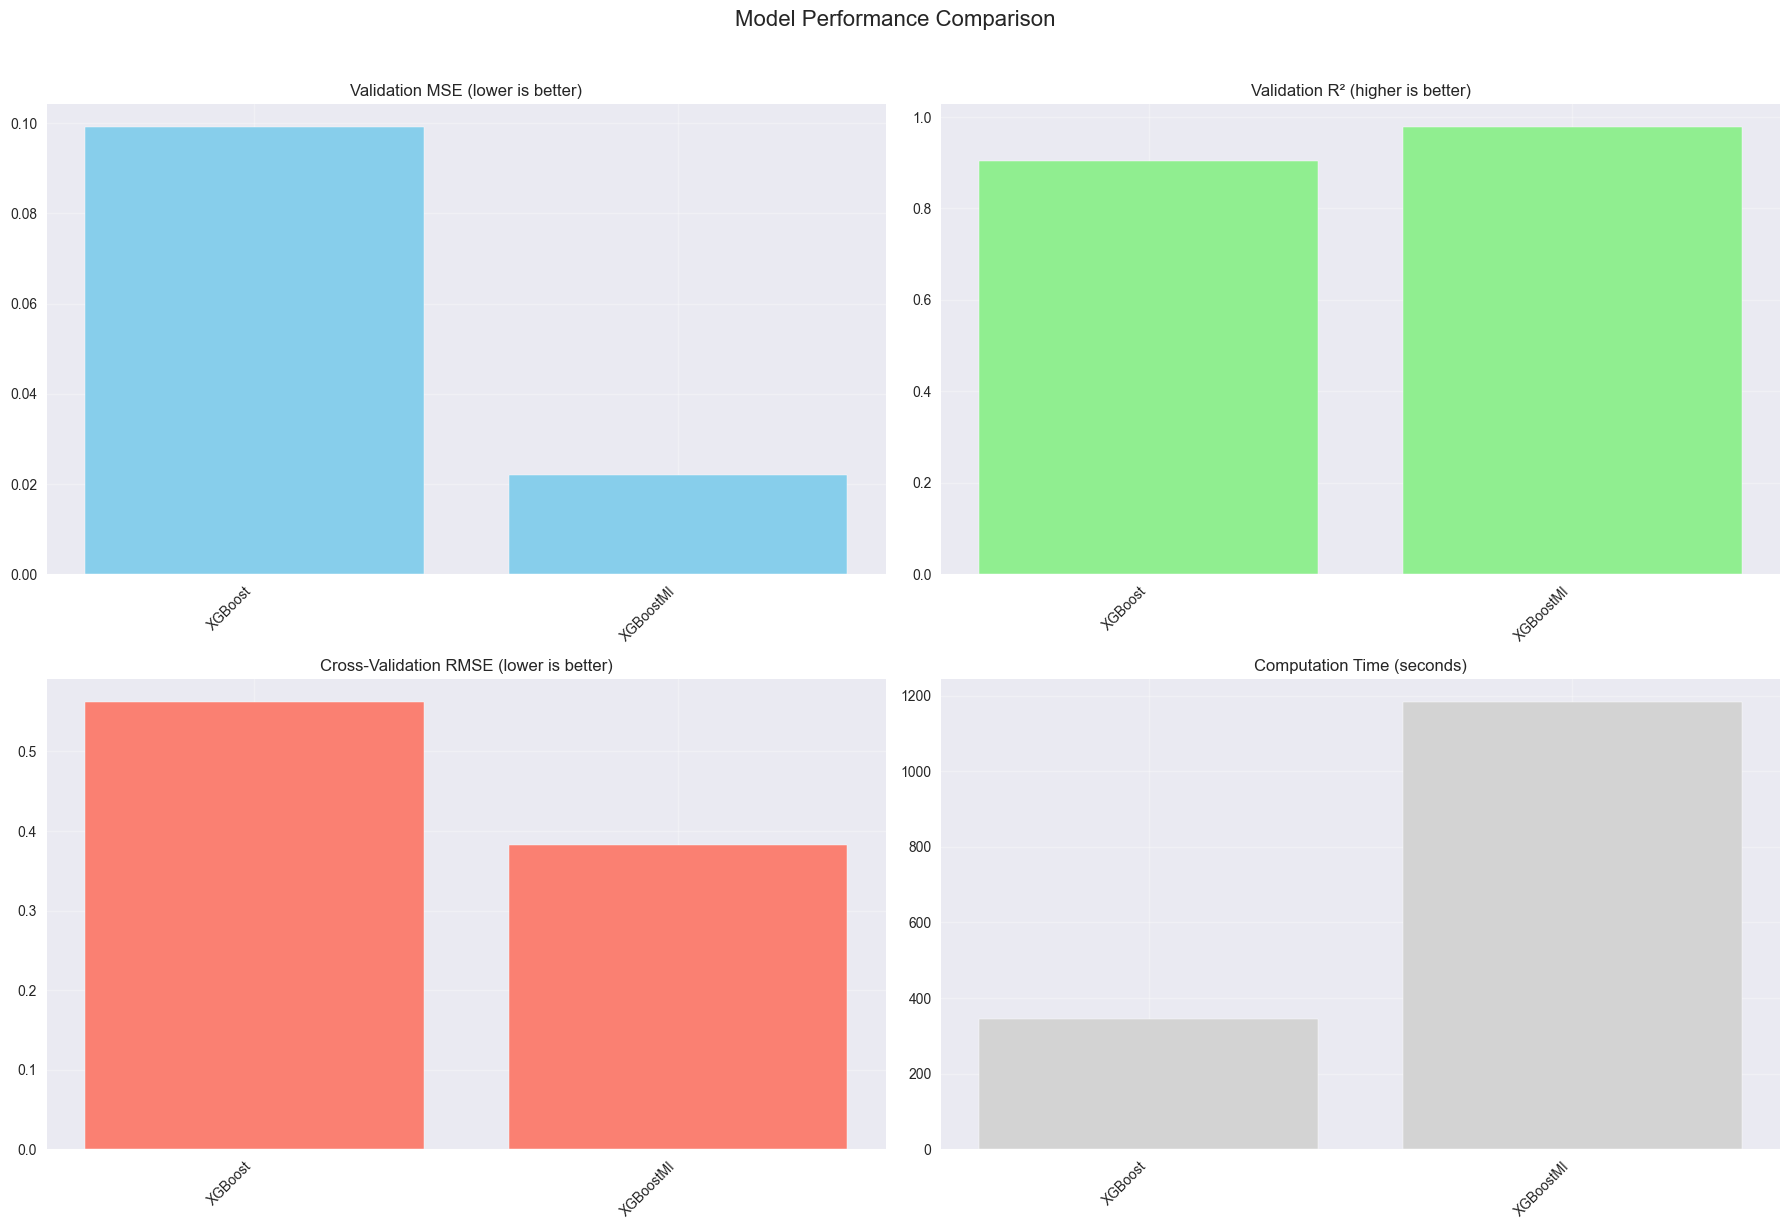

In [146]:
# Visualize model performance comparison
model_names = list(model_results.keys())
val_mses = [model_results[m]['val_mse'] for m in model_names]
val_r2s = [model_results[m]['val_r2'] for m in model_names]
cv_rmses = [model_results[m]['cv_rmse'] for m in model_names]
times = [model_results[m]['time'] for m in model_names]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, y=1.02)

# 1. Validation MSE
axes[0, 0].bar(model_names, val_mses, color='skyblue')
axes[0, 0].set_title('Validation MSE (lower is better)')
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# 2. Validation R²
axes[0, 1].bar(model_names, val_r2s, color='lightgreen')
axes[0, 1].set_title('Validation R² (higher is better)')
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-Validation RMSE
axes[1, 0].bar(model_names, cv_rmses, color='salmon')
axes[1, 0].set_title('Cross-Validation RMSE (lower is better)')
axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Computation Time
axes[1, 1].bar(model_names, times, color='lightgray')
axes[1, 1].set_title('Computation Time (seconds)')
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [147]:
# Get feature importance from tree-based models
print("=== FEATURE IMPORTANCE FROM TREE-BASED MODELS ===")

# Get best model based on validation MSE
# best_model_name = min(model_results, key=lambda k: model_results[k]['val_mse'])
best_model_name = xgb_model_MI_corr
print(f"Best model based on validation MSE: {best_model_name} (MSE: {model_results[best_model_name]['val_mse']:.6f})")

# Extract feature importance from tree-based models
if 'Random Forest' in model_results:
    rf_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_results['Random Forest']['model'].feature_importances_
    }).sort_values('Importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=rf_feature_importance, palette='viridis')
    plt.title('Random Forest - Top 20 Feature Importance')
    plt.tight_layout()
    plt.show()

    print("\nRandom Forest - Top 10 Important Features:")
    for i, row in rf_feature_importance.head(10).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.6f}")

if 'XGBoost' in model_results:
    xgb_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model_results['XGBoost']['model'].feature_importances_
    }).sort_values('Importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance, palette='plasma')
    plt.title('XGBoost - Top 20 Feature Importance')
    plt.tight_layout()
    plt.show()

    print("\nXGBoost - Top 10 Important Features:")
    for i, row in xgb_feature_importance.head(10).iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.6f}")


=== FEATURE IMPORTANCE FROM TREE-BASED MODELS ===


KeyError: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [145]:
# Generate predictions on test data using the best model
print("\n=== PREDICTIONS ON TEST DATA ===")

best_model = model_results[best_model_name]['model']

# Prepare test data
X_test = test[MI_corr_features].copy()
X_test = X_test.fillna(X_test.mean())  # Fill NAs with mean

# Generate predictions
test_predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'ID': sample_sub['ID'],
    'prediction': test_predictions
})
print(f"Best Model: {best_model_name}")
print(f"Test predictions summary:")
print(f"  Count: {len(test_predictions)}")
print(f"  Mean: {test_predictions.mean():.6f}")
print(f"  Std: {test_predictions.std():.6f}")
print(f"  Min: {test_predictions.min():.6f}")
print(f"  Max: {test_predictions.max():.6f}")

# Save submission
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created.")



=== PREDICTIONS ON TEST DATA ===
Best Model: XGBoostMI
Test predictions summary:
  Count: 538150
  Mean: 0.817197
  Std: 1.255232
  Min: -8.297116
  Max: 9.130263

Submission file created.


=== XGBoost Grid Search Optimization ===
Starting grid search. This may take some time...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   8.4s
[C

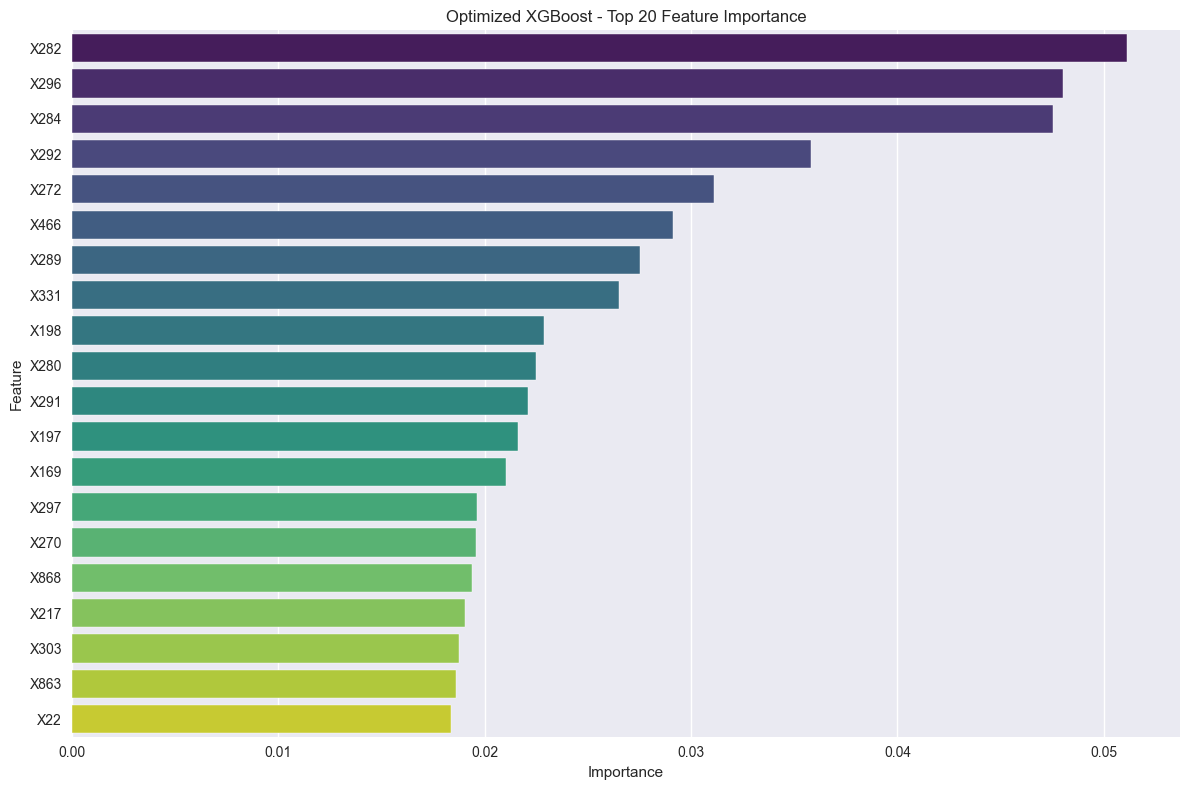

In [58]:
# Grid Search for XGBoost model optimization
print("=== XGBoost Grid Search Optimization ===")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# For faster execution, you can use a smaller grid
param_grid_small = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Create the base XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Define a negative mean squared error scorer (GridSearchCV tries to maximize the score)
rmse_scorer = make_scorer(lambda y, y_pred: -np.sqrt(mean_squared_error(y, y_pred)))

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_small,  # Use the smaller grid for faster execution
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fill any missing values in the dataset
X_grid = X.fillna(X.mean())
y_grid = y.copy()

# Fit the grid search to the data
print("Starting grid search. This may take some time...")
grid_search.fit(X_grid, y_grid)

# Print the best parameters and score
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest RMSE: {-grid_search.best_score_:.6f}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the optimized model
print("\nEvaluating optimized XGBoost model...")
best_xgb = evaluate_model(best_xgb_model, "Optimized XGBoost", X_train, y_train, X_val, y_val)

# Compare with the previous XGBoost model
print("\nImprovement from baseline XGBoost:")
baseline_val_mse = model_results["XGBoost"]["val_mse"]
optimized_val_mse = model_results["Optimized XGBoost"]["val_mse"]
improvement = (baseline_val_mse - optimized_val_mse) / baseline_val_mse * 100
print(f"  Validation MSE reduction: {improvement:.2f}%")

# Feature importance of the optimized model
optimized_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=optimized_feature_importance, palette='viridis')
plt.title('Optimized XGBoost - Top 20 Feature Importance')
plt.tight_layout()
plt.show()

=== XGBoost n_estimators Optimization ===
Starting grid search for n_estimators optimization...
Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.6s
[CV] 

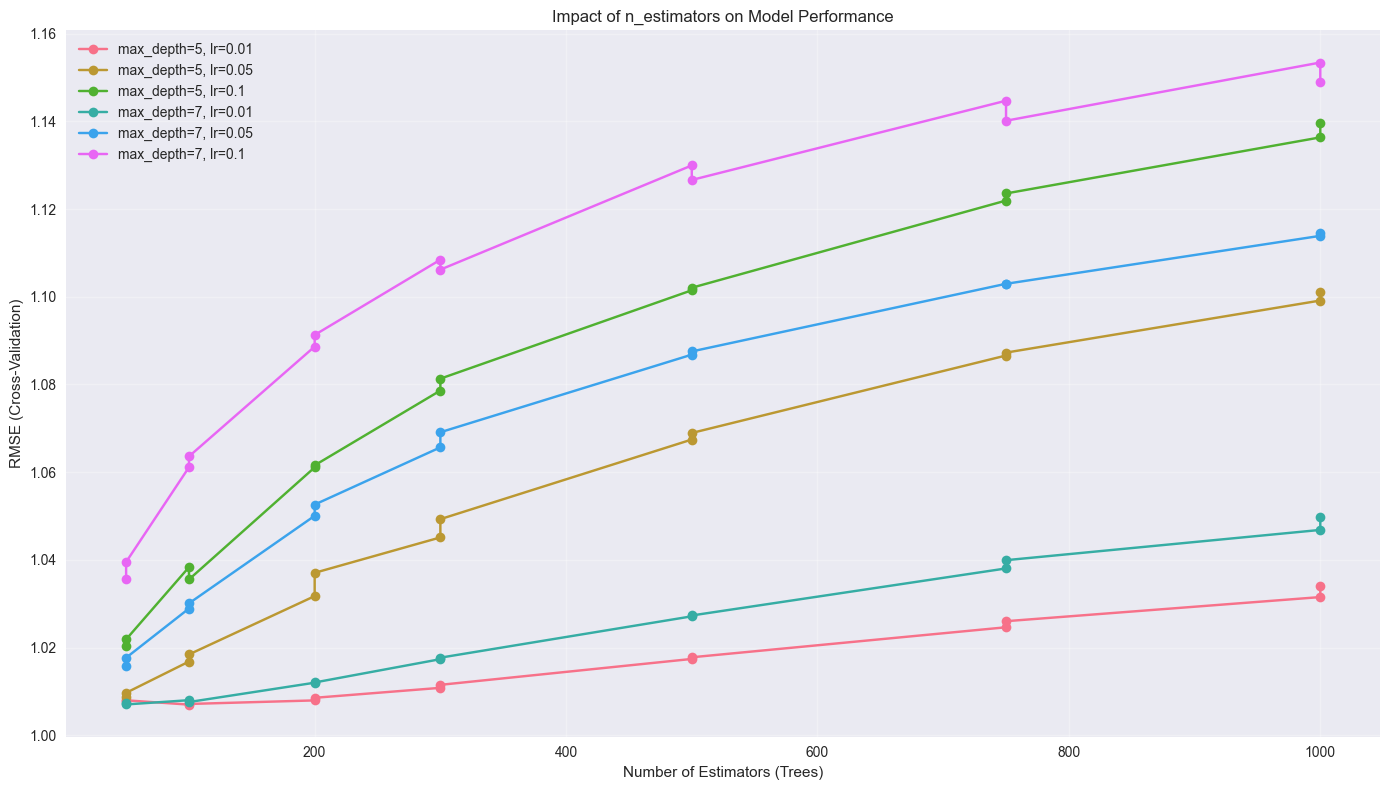

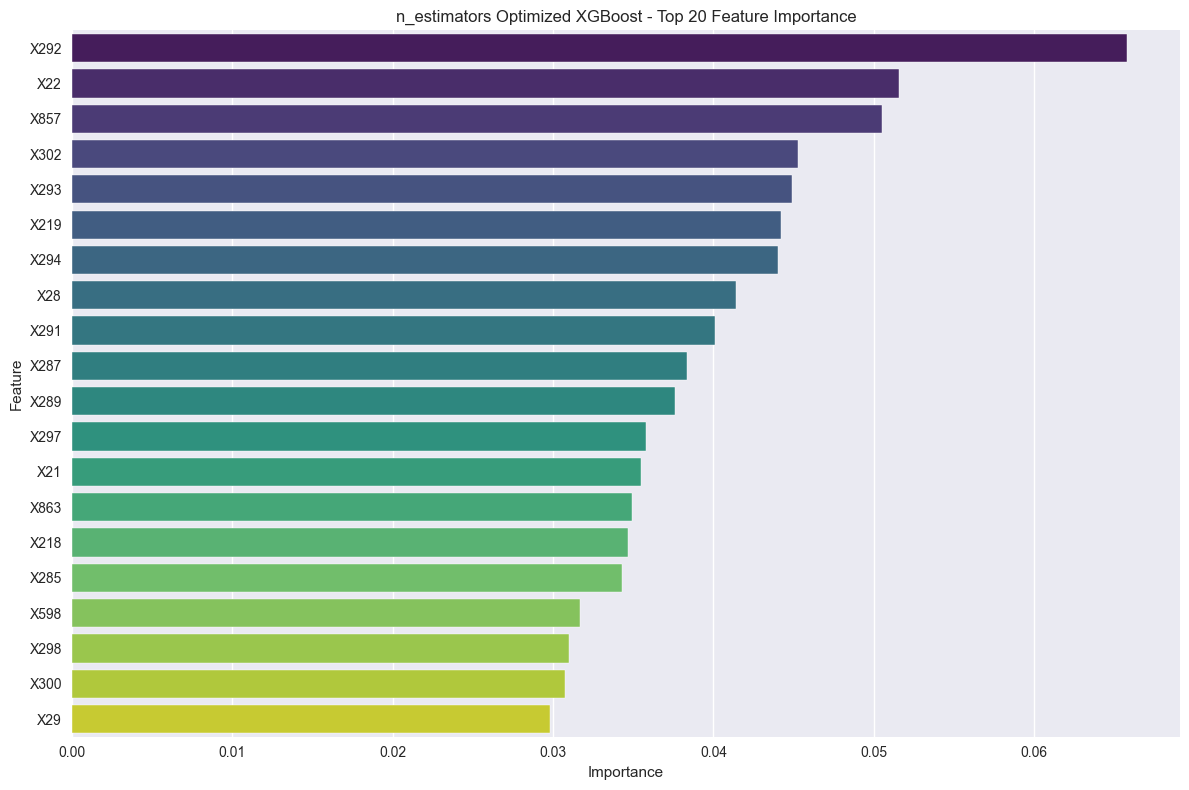

In [41]:
# Grid Search for XGBoost model optimization focusing on n_estimators
print("=== XGBoost n_estimators Optimization ===")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define a focused parameter grid that emphasizes n_estimators
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500, 750, 1000],
    'max_depth': [5, 7],  # Limited options for max_depth
    'learning_rate': [0.01, 0.05, 0.1],  # Limited options for learning rate
    'subsample': [0.8, 1.0]  # Limited options for subsample
}

# Create the base XGBoost model with default values for other parameters
xgb_model = xgb.XGBRegressor(
    random_state=42,
    n_jobs=-1,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1
)

# Define RMSE scorer (negative because GridSearchCV maximizes the score)
rmse_scorer = make_scorer(lambda y, y_pred: -np.sqrt(mean_squared_error(y, y_pred)))

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fill any missing values in the dataset
X_grid = X.fillna(X.mean())
y_grid = y.copy()

# Fit the grid search to the data
print("Starting grid search for n_estimators optimization...")
grid_search.fit(X_grid, y_grid)

# Print the best parameters and score
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest RMSE: {-grid_search.best_score_:.6f}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the optimized model
print("\nEvaluating n_estimators-optimized XGBoost model...")
best_xgb = evaluate_model(best_xgb_model, "n_estimators Optimized XGBoost", X_train, y_train, X_val, y_val)

# Compare with the previous XGBoost model
print("\nImprovement from baseline XGBoost:")
baseline_val_mse = model_results["XGBoost"]["val_mse"]
optimized_val_mse = model_results["n_estimators Optimized XGBoost"]["val_mse"]
improvement = (baseline_val_mse - optimized_val_mse) / baseline_val_mse * 100
print(f"  Validation MSE reduction: {improvement:.2f}%")

# Analyze n_estimators vs RMSE trend
results = grid_search.cv_results_
n_estimators_values = []
rmse_values = []

# Extract n_estimators and corresponding RMSE for each max_depth and learning_rate combination
for i in range(len(results['params'])):
    n_estimators = results['params'][i]['n_estimators']
    rmse = -results['mean_test_score'][i]
    max_depth = results['params'][i]['max_depth']
    lr = results['params'][i]['learning_rate']
    n_estimators_values.append((n_estimators, max_depth, lr))
    rmse_values.append(rmse)

# Create DataFrame for visualization
results_df = pd.DataFrame({
    'n_estimators': [x[0] for x in n_estimators_values],
    'max_depth': [x[1] for x in n_estimators_values],
    'learning_rate': [x[2] for x in n_estimators_values],
    'RMSE': rmse_values
})

# Plot n_estimators vs RMSE for different max_depth and learning_rate combinations
plt.figure(figsize=(14, 8))
for depth in results_df['max_depth'].unique():
    for lr in results_df['learning_rate'].unique():
        subset = results_df[(results_df['max_depth'] == depth) & (results_df['learning_rate'] == lr)]
        if not subset.empty:
            plt.plot(subset['n_estimators'], subset['RMSE'],
                     marker='o', label=f'max_depth={depth}, lr={lr}')

plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('Impact of n_estimators on Model Performance')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance of the optimized model
optimized_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=optimized_feature_importance, palette='viridis')
plt.title('n_estimators Optimized XGBoost - Top 20 Feature Importance')
plt.tight_layout()
plt.show()

### Mutual Information Scores for Features


In [27]:
feature_mi_scores = make_mi_scores(X, y)
feature_mi_scores[::3]  # show a few features with their MI scores

X853    0.216739
X881    0.094666
X137    0.093643
X95     0.092239
X140    0.089822
          ...   
X550    0.004187
X620    0.003673
X599    0.002149
X623    0.001397
X624    0.001031
Name: MI Scores, Length: 290, dtype: float64

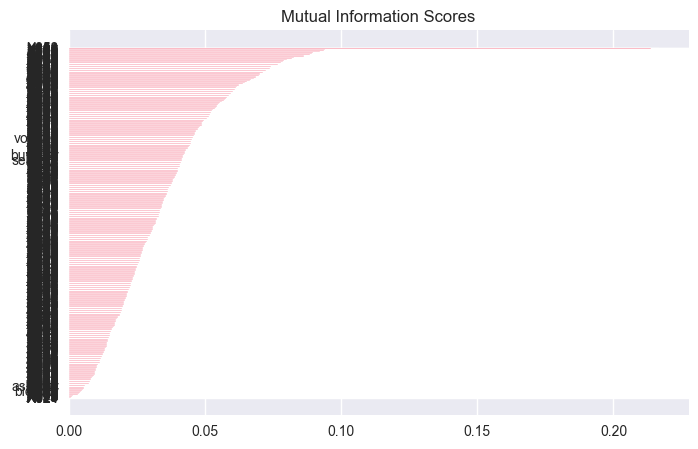

In [30]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

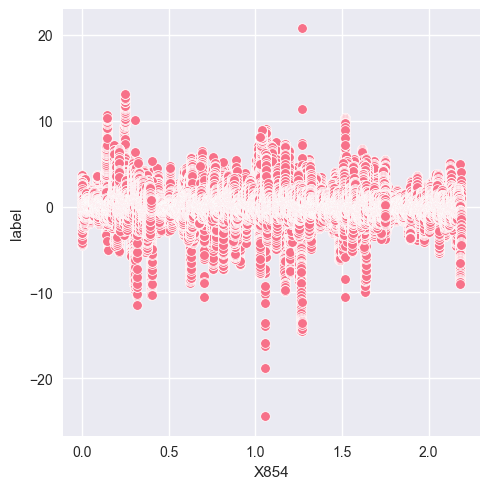

In [108]:
sns.relplot(x="X854", y="label", data=train);

In [58]:
feature_mi_scores.sort_values(ascending=False)

X853    0.216739
X854    0.213783
X862    0.097195
X881    0.094666
X880    0.094134
          ...   
X199    0.001601
X623    0.001397
X618    0.001293
X621    0.001070
X624    0.001031
Name: MI Scores, Length: 868, dtype: float64

In [497]:
#Get top MI scores for the features
#  .drop(['X854', 'X853'])
top_MI_features = feature_mi_scores[feature_mi_scores > 0.08].index.tolist()

SyntaxError: unmatched ')' (3079172212.py, line 3)

In [93]:
#Convert to a dataframe
feature_mi_df = (feature_mi_scores
            .rename("MI")          # name the Series so it becomes the column name
            .reset_index()         # index → column called "index"
            .rename(columns={"index":"Feature"}))
feature_mi_df

Feature        MI
0      X853  0.216739
1      X854  0.213783
2      X862  0.097195
3      X881  0.094666
4      X880  0.094134
..      ...       ...
863    X199  0.001601
864    X623  0.001397
865    X618  0.001293
866    X621  0.001070
867    X624  0.001031

[868 rows x 2 columns]

In [110]:
#Load in previously calculated feature MI scores
feature_mi_df.to_csv("feature_MI_Scores.csv", index=False)

In [96]:
joined = corr_df.merge(feature_mi_df, on="Feature", how="left")
joined.sort_values(by='MI', ascending=False, inplace=True)
joined

Feature  Correlation  Abs_Correlation        P_Value        MI
518    X853     0.011683         0.011683   2.398068e-17  0.216739
689    X854    -0.006139         0.006139   8.515553e-06  0.213783
64     X862     0.040828         0.040828  8.334086e-193  0.097195
304    X881     0.021525         0.021525   6.090567e-55  0.094666
214    X880     0.027225         0.027225   8.576326e-87  0.094134
..      ...          ...              ...            ...       ...
639    X199    -0.007817         0.007817   1.437172e-08  0.001601
641    X623     0.007696         0.007696   2.395379e-08  0.001397
797    X618    -0.002263         0.002263   1.008439e-01  0.001293
778    X621    -0.002909         0.002909   3.486954e-02  0.001070
777    X624    -0.002942         0.002942   3.290193e-02  0.001031

[868 rows x 5 columns]

### Investigating X853 & X854
- Features X853, X854 are huge MI outliers and upon further investigation we find they are periodic timestamps.
- Their period appears to reset on the historical dates for Bitcoin futures.
- This leads us to conclude that:
A. We are indeed working with historical bitcoin data.
B. The features represent a standardized "days until bitcoin future" and it's inverse (ascending)

In [496]:
# X854 and X853 are huge outliers which we discovered are some kind of period timestamp
# Likely cadidate is time to next bitcoin future
train[['X854', 'X853']].corr()

X854      X853
X854  1.000000 -0.930292
X853 -0.930292  1.000000

In [285]:
# Top 5 largest values
top_n = train['X854'].nlargest(12)  # Returns Series: index and value
top_n

timestamp
2023-03-31 15:00:00    2.187500
2023-06-30 15:00:00    2.187500
2023-09-29 15:00:00    2.187500
2023-12-29 15:00:00    2.187500
2023-03-31 14:59:00    2.187457
2023-06-30 14:59:00    2.187457
2023-09-29 14:59:00    2.187457
2023-12-29 14:59:00    2.187457
2023-03-31 14:58:00    2.187413
2023-06-30 14:58:00    2.187413
2023-09-29 14:58:00    2.187413
2023-12-29 14:58:00    2.187413
Name: X854, dtype: float64

In [289]:
# Local Maxima for X854 min for X853
s = train['X854']
local_maxima = s[(s.shift(1) < s) & (s.shift(-1) < s)]
local_maxima

timestamp
2023-03-31 15:00:00    2.1875
2023-04-28 15:00:00    1.7500
2023-05-26 15:00:00    1.7500
2023-06-30 15:00:00    2.1875
2023-07-28 15:00:00    1.7500
2023-08-25 15:00:00    1.7500
2023-09-29 15:00:00    2.1875
2023-10-27 15:00:00    1.7500
2023-11-24 15:00:00    1.7500
2023-12-29 15:00:00    2.1875
2024-01-26 15:00:00    1.7500
2024-02-23 15:00:00    1.7500
Name: X854, dtype: float64

In [556]:
# Attempt transforms on X853 and X854 to attempt to reverse engineer time-series
btc_futures = 2 - train['X853']
btc_futures.concat(btc_futures, train['X854'])
btc_futures

AttributeError: 'Series' object has no attribute 'concat'

### Feature MI vs. Linear Correlation

In [83]:
spearman = joined[["MI","Abs_Correlation"]].assign(absR=lambda d: d["Abs_Correlation"].abs()) \
                         .corr(method="spearman").loc["MI","Abs_Correlation"]
print(f"Spearman rank‐corr between MI and |R|: {spearman:.3f}")

Spearman rank‐corr between MI and |R|: 0.192


In [153]:
joined = joined[~joined['Feature'].isin(['X854', 'X853'])]
joined["ρ_eq"] = np.sqrt(1 - np.exp(-2 * joined["MI"]))
pearson = joined[["MI","ρ_eq"]].corr().loc["MI","ρ_eq"]
print(f"Pearson corr between MI and its Gaussian‐equivalent ρ: {pearson:.3f}")

Pearson corr between MI and its Gaussian‐equivalent ρ: 0.978


In [154]:
# Scatter with Feature labels
fig = px.scatter(
    joined,
    x="Abs_Correlation",
    y="MI",
    text="Feature",                  # now uses your Feature column
    labels={
        "absR": "|Pearson r|",
        "MI":   "Mutual information (nats)"
    }
)
fig.update_traces(marker=dict(size=6), selector=dict(mode="markers"))
fig.update_traces(textposition="top center")
fig.show()

### Exploring Other Feature Relationships

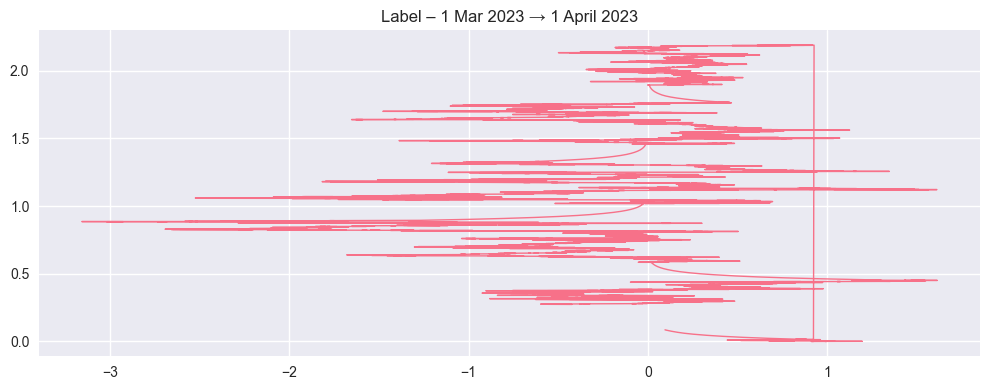

In [316]:
# zoom in on one week
zoom = train.loc["2023-03-01":"2023-04-01"]

plt.figure(figsize=(10, 4))
plt.plot(zoom['X841'], zoom["X854"], lw=1)
plt.title("Label – 1 Mar 2023 → 1 April 2023")
plt.tight_layout()
plt.show()

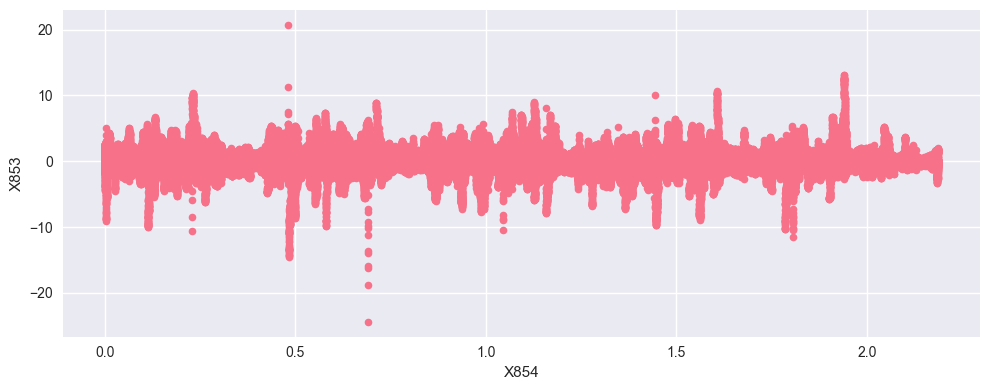

In [186]:
#
plt.figure(figsize=(10, 4))

plt.scatter(train["X853"], train["label"], s=20, linewidth=1)
plt.xlabel("X854")
plt.ylabel("X853")
plt.tight_layout()
plt.show()

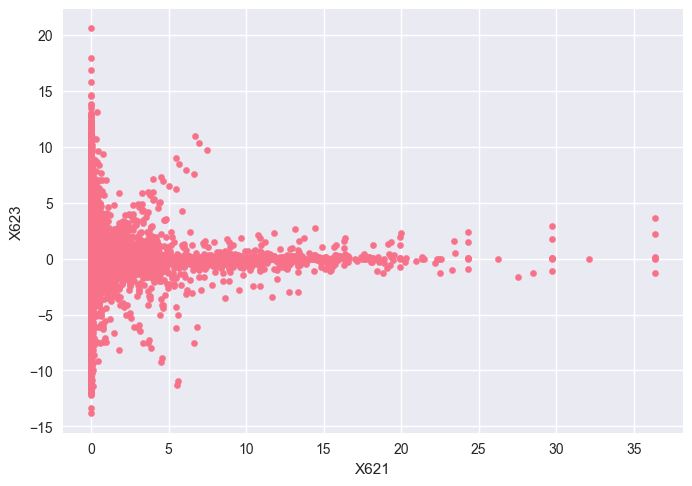

In [303]:
plt.scatter(test['X621'], test["X623"], s=20)
plt.xlabel("X621")
plt.ylabel("X623")
plt.show()

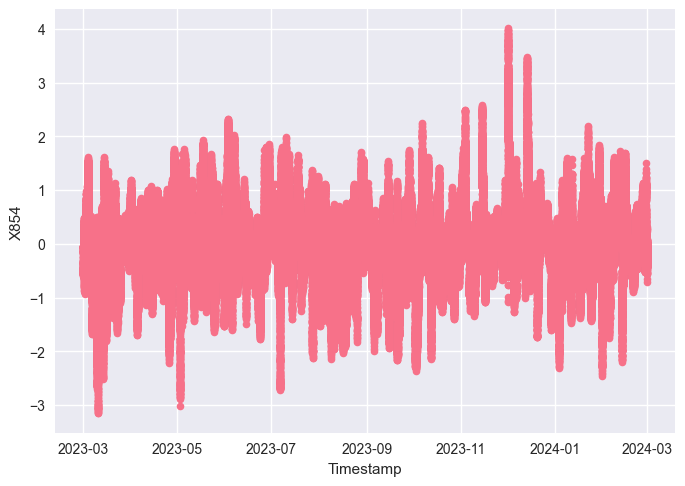

In [204]:
plt.scatter(train.index, train["X854"], s=20)
plt.xlabel("Timestamp")
plt.ylabel("X854")
plt.show()

132328


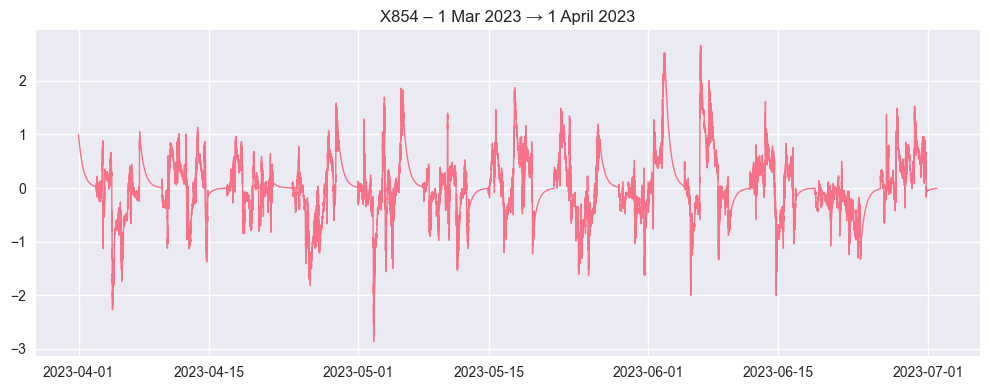

In [297]:
plt.show()
# zoom in on one week
zoom = train.loc["2023-04-01":"2023-07-01"]

#840 similar ratio? periodical
#851 something like bid ask side imbalance
plt.figure(figsize=(10, 4))
plt.plot(zoom.index, zoom["X840"], lw=1)
plt.title("X854 – 1 Mar 2023 → 1 April 2023")
print(len(zoom.index))
plt.tight_layout()
plt.show()

### Investigating Label
- I am fairly confident that the label variable is the standard forward return at time t, based on buying at time t and holding to time t+1.
- Using future price data to generate the label and then training the model to predict the label using data from time t is likely for two reasons:
- A. It provides an indicator of if the asset will go up or down at timestep t+1, i.e. positive and negative sign,
- B. a confidence indicator, i.e. magnitude: how much the model predicts the asset price will move, which is usful for calculating the optimal position size.

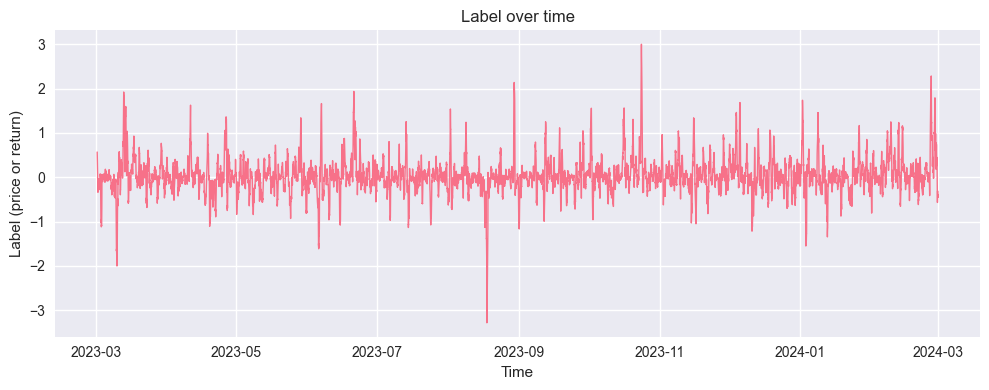

In [322]:
# Full Timeseries
plt.figure(figsize=(10, 4))

plt.plot(train.index, train['label'].rolling(window=720).mean(), linewidth=1)
plt.title("Label over time")
plt.xlabel("Time")
plt.ylabel("Label (price or return)")
plt.tight_layout()
plt.show()

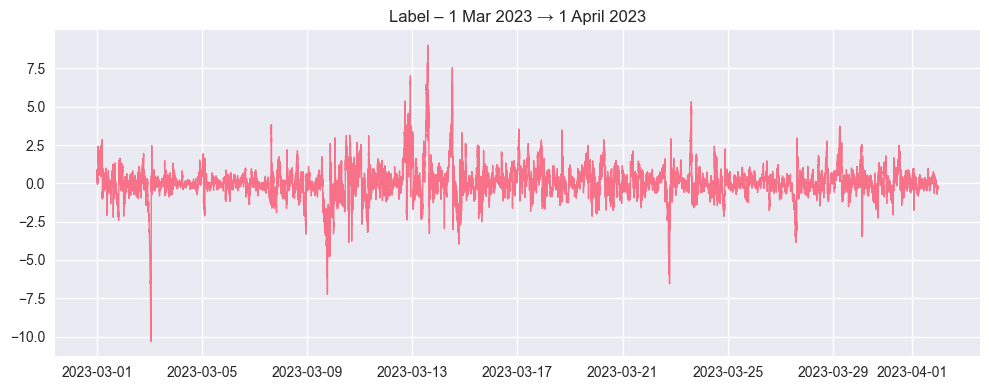

In [315]:
# zoom in on one week
zoom = train.loc["2023-03-01":"2023-04-01"]

plt.figure(figsize=(10, 4))
plt.plot(zoom.index, zoom["label"], lw=1)
plt.title("Label – 1 Mar 2023 → 1 April 2023")
plt.tight_layout()
plt.show()

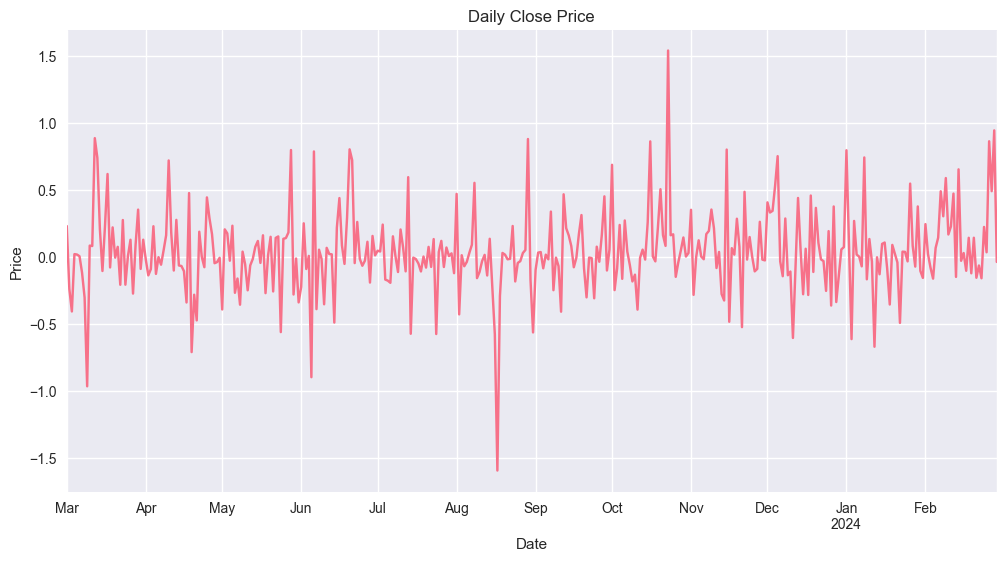

In [522]:
# Plot average daily change
train['label'].resample('D').mean().plot(figsize=(12, 6), title='Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [551]:
#loading historical btc data
prices = pd.read_csv('messy_btc_prices.csv')
prices

Date      Open      High       Low     close  adj_close  \
0    01-Apr-24  71333.48  71342.09  68110.70  69702.15   69702.15   
1    31-Mar-24  69647.78  71377.78  69624.87  71333.65   71333.65   
2    30-Mar-24  69893.45  70355.49  69601.06  69645.30   69645.30   
3    29-Mar-24  70744.80  70913.09  69076.66  69892.83   69892.83   
4    28-Mar-24  69452.77  71546.02  68895.51  70744.95   70744.95   
..         ...       ...       ...       ...       ...        ...   
394  04-Mar-23  22362.92  22405.18  22198.98  22353.35   22353.35   
395  03-Mar-23  23476.63  23479.35  22213.24  22362.68   22362.68   
396  02-Mar-23  23647.02  23739.14  23245.02  23475.47   23475.47   
397  01-Mar-23  23150.93  23880.63  23088.63  23646.55   23646.55   
398        NaN       NaN       NaN       NaN       NaN        NaN   

           Volume  daily_returns_adj  daily_fwd_returns_adj  
0    3.487353e+10           0.023407              -0.022871  
1    2.005094e+10          -0.023668               0.024242  
2    1.713024e+10           0.003554              -0.003542  
3    2.523085e+10           0.012192              -0.012045  
4    3.437490e+10          -0.018229               0.018567  
..            ...                ...                    ...  
394  1.116601e+10           0.000417              -0.000417  
395  2.606240e+10           0.049761              -0.047402  
396  2.038640e+10           0.007288              -0.007235  
397  2.466284e+10                NaN                    NaN  
398           NaN                NaN                    NaN  

[399 rows x 9 columns]

In [552]:
#merge label data with external price data
#'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1'... 'X890', label'
date_label = train[['label']].resample('D').mean().reset_index()

date_label['timestamp'] = pd.to_datetime(date_label['timestamp'])
prices['Date'] = pd.to_datetime(prices['Date'])

merged = pd.merge(prices, date_label, left_on='Date', right_on='timestamp', how='left')
merged.dropna(inplace=True)
merged.drop(columns=['timestamp'], inplace=True)
merged.sort_index(ascending=False, inplace=True)
print(merged.columns)
merged

Index(['Date', 'Open', 'High', 'Low', 'close', 'adj_close', 'Volume',
       'daily_returns_adj', 'daily_fwd_returns_adj', 'label'],
      dtype='object')


Date      Open      High       Low     close  adj_close  \
396 2023-03-02  23647.02  23739.14  23245.02  23475.47   23475.47   
395 2023-03-03  23476.63  23479.35  22213.24  22362.68   22362.68   
394 2023-03-04  22362.92  22405.18  22198.98  22353.35   22353.35   
393 2023-03-05  22354.14  22613.69  22307.14  22435.51   22435.51   
392 2023-03-06  22436.82  22584.29  22331.31  22429.76   22429.76   
..         ...       ...       ...       ...       ...        ...   
36  2024-02-25  51565.21  51950.03  51306.17  51733.24   51733.24   
35  2024-02-26  51730.54  54938.18  50931.03  54522.40   54522.40   
34  2024-02-27  54519.36  57537.84  54484.20  57085.37   57085.37   
33  2024-02-28  57071.10  63913.13  56738.43  62504.79   62504.79   
32  2024-02-29  62499.18  63585.64  60498.73  61198.38   61198.38   

           Volume  daily_returns_adj  daily_fwd_returns_adj     label  
396  2.038640e+10           0.007288              -0.007235 -0.239578  
395  2.606240e+10           0.049761              -0.047402 -0.407779  
394  1.116601e+10           0.000417              -0.000417  0.020214  
393  1.331700e+10          -0.003662               0.003676  0.017085  
392  1.735319e+10           0.000256              -0.000256  0.004556  
..            ...                ...                    ...       ...  
36   1.541324e+10          -0.003134               0.003144  0.034159  
35   3.407441e+10          -0.051156               0.053914  0.862630  
34   4.975683e+10          -0.044897               0.047008  0.490103  
33   8.323916e+10          -0.086704               0.094935  0.943944  
32   6.549661e+10           0.021347              -0.020901 -0.038095  

[365 rows x 10 columns]

In [553]:
#check label against our excel formula
# merged[['daily_returns_adj', 'label']].corr()
merged[['daily_fwd_returns_adj', 'label']].corr()

daily_fwd_returns_adj     label
daily_fwd_returns_adj               1.000000  0.944989
label                               0.944989  1.000000

In [554]:
#Reproduced excel formula, close match for label
merged['Y'] = merged['close']/merged['close'].shift(1) - 1
merged[['Y', 'label']].corr()

Y     label
Y      1.000000  0.945198
label  0.945198  1.000000

In [555]:
# Using Open price is a little better and is more intuitive
# This also makes more sense theoretically because you are generating a confidence prediction for the next period's price based on the current period's data
merged['Y_Open'] = merged['Open'].shift(-1)/merged['Open'] - 1
merged[['Y_Open', 'label']].corr()

Y_Open     label
Y_Open  1.000000  0.945487
label   0.945487  1.000000

### Signal Processing

In [ ]:
# Signal Processing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

class HampelSavgol(BaseEstimator, TransformerMixin):
    def __init__(self, hampel_w=9, hampel_k=3, sg_w=11, sg_p=3):
        self.hampel_w, self.hampel_k = hampel_w, hampel_k
        self.sg_w, self.sg_p = sg_w, sg_p
    def fit(self, X, y=None):  # stateless
        return self
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = hampel(X[col], self.hampel_w, self.hampel_k)
            if col in PRICE_LIKE_COLS:
                sg = savgol(X[col], self.sg_w, self.sg_p)
                X[f'{col}_sg'] = sg
                X[f'{col}_resid'] = X[col] - sg
        return X

pipe = Pipeline([
    ('clean', HampelSavgol()),
    ('scale', RobustScaler(quantile_range=(5,95)))
])